## 호텔 예약 데이터 세트

- 호텔 예약 수요 분석은 시간이 지남에 따라 호텔 객실 예약의 양과 패턴을 평가하는 과정이다.

- 이 분석은 객실에 대한 수요를 이해하고, 미래 동향을 예측하고, 객실 가격 책정, 재고 관리 및 마케팅 전략에 대한 정보에 입각한 결정을 내리는 데 도움이 된다.
  

[kaggle link!](https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset/data)

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
df = pd.read_csv('/home/leejieun/workspace/kaggle-notebooks/datasets/ahsan81/hotel-reservations-classification-dataset/Hotel Reservations.csv')

In [34]:
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [35]:
df.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [37]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.0,1.844962,0.518715,0.0,2.0,2.00,2.0,4.0
no_of_children,36275.0,0.105279,0.402648,0.0,0.0,0.00,0.0,10.0
no_of_weekend_nights,36275.0,0.810724,0.870644,0.0,0.0,1.00,2.0,7.0
no_of_week_nights,36275.0,2.204300,1.410905,0.0,1.0,2.00,3.0,17.0
required_car_parking_space,36275.0,0.030986,0.173281,0.0,0.0,0.00,0.0,1.0
lead_time,36275.0,85.232557,85.930817,0.0,17.0,57.00,126.0,443.0
arrival_year,36275.0,2017.820427,0.383836,2017.0,2018.0,2018.00,2018.0,2018.0
arrival_month,36275.0,7.423653,3.069894,1.0,5.0,8.00,10.0,12.0
arrival_date,36275.0,15.596995,8.740447,1.0,8.0,16.00,23.0,31.0
repeated_guest,36275.0,0.025637,0.158053,0.0,0.0,0.00,0.0,1.0


In [38]:
#conda install missingno

In [39]:
import missingno as msno

<Axes: >

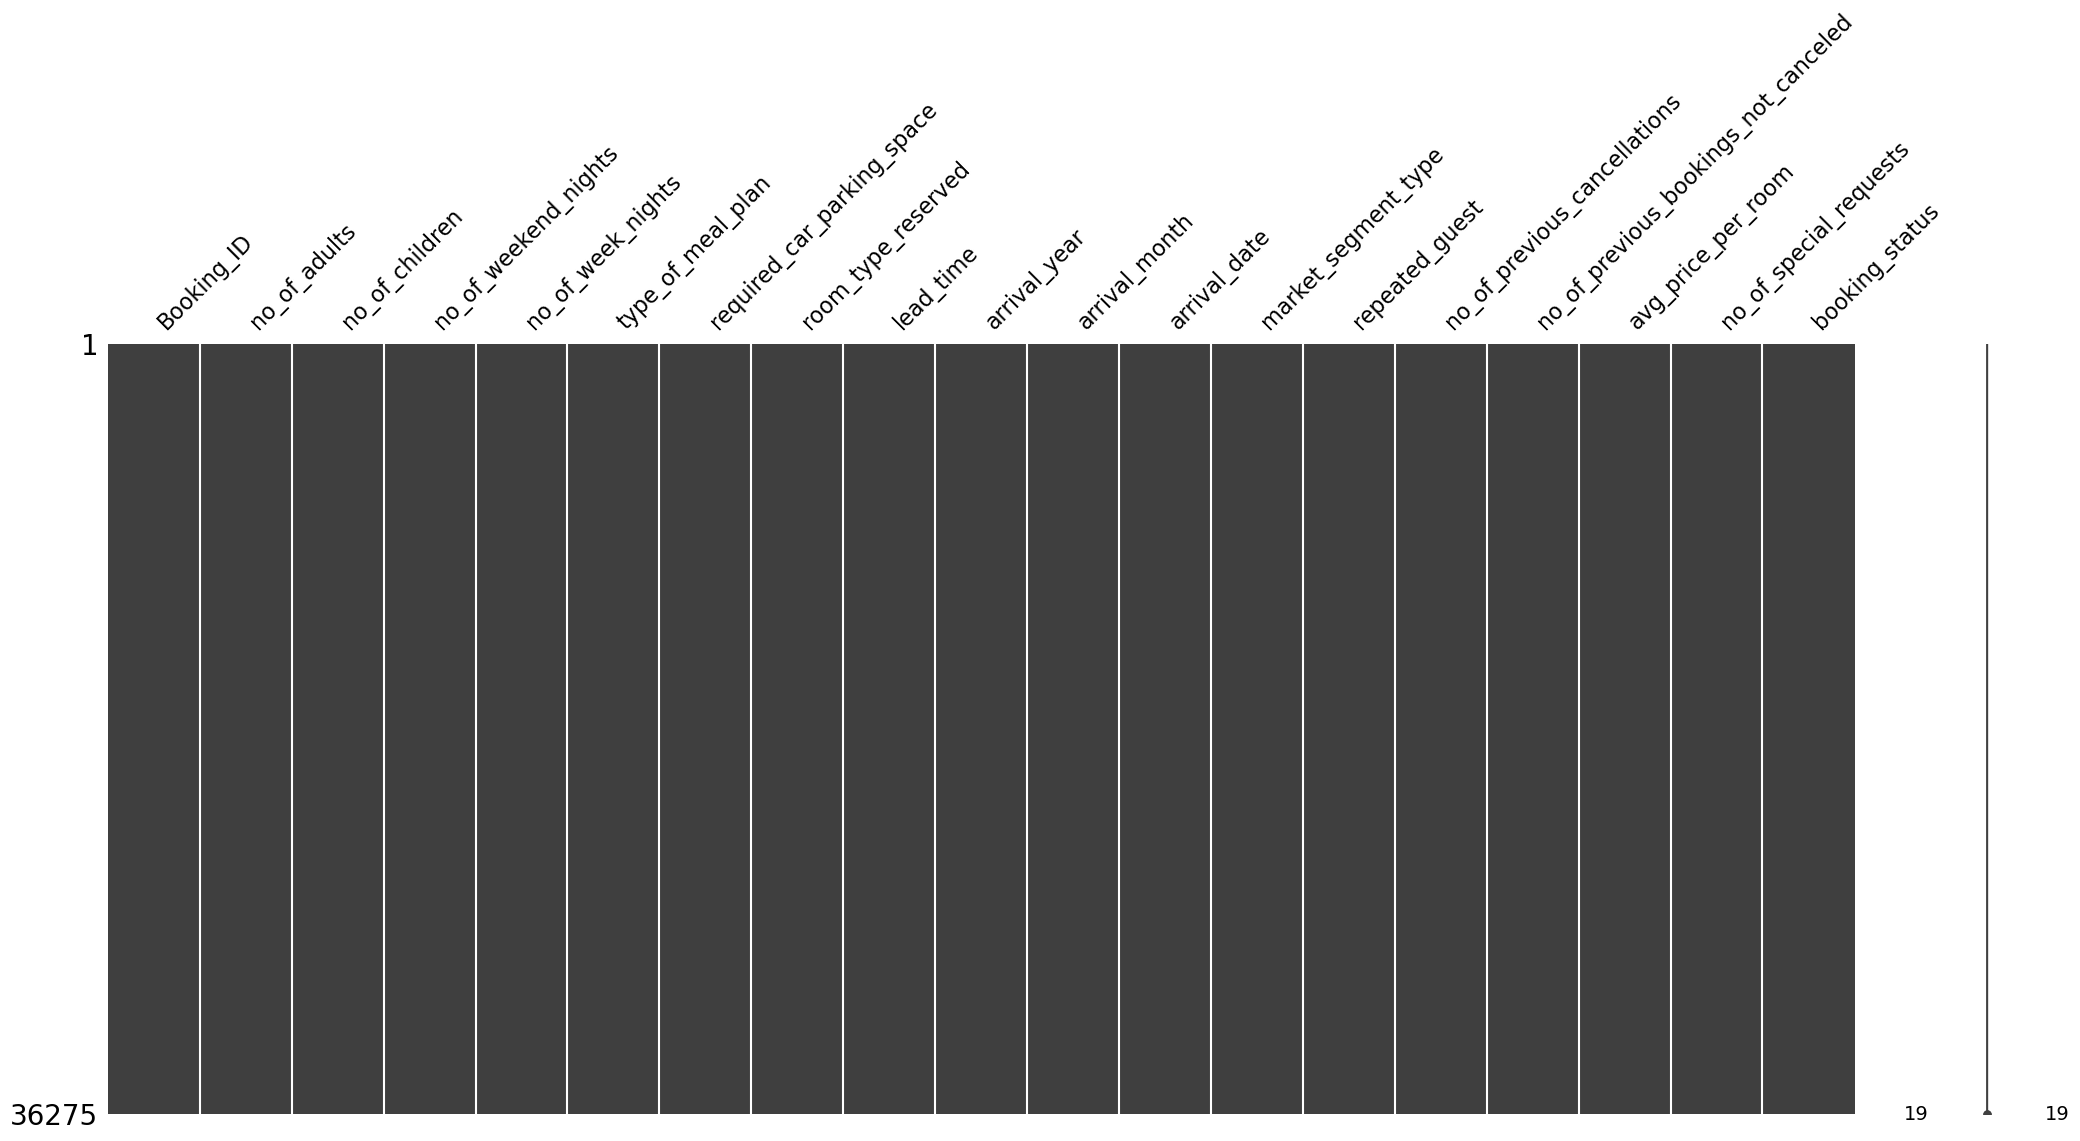

In [40]:
msno.matrix(df)

In [41]:
df = df.drop('Booking_ID', axis=1)

In [42]:
df

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


## Graph
- 정렬
  - 데이터 타입이 str이면 순서대로 정렬
  - 데이터 타입이 str이 아니면 오름차순으로 정렬
- 그래프 종류
  - bar: x축의 컬럼이 2개 이하
  - line: x축의 컬럼이 2개 이상
- 그래프 속성
  - for 문 사용
    - y축은 데이터의 크기에 따라 조정
    - 그래프 위에 데이터 값 별로 text 를 추가
      - y축의 0.25 이동하여 표기
      - 소수점 한자리까지 표기
      - ha: horizontalalignment : x 축에서의 위치
      - va: verticalalignment : y 축에서의 위치

In [43]:
def make_bar_graph(feature):
    if type(df[str(feature)].value_counts().index[0]) == str:
        x = df[str(feature)].value_counts().index
        y = df[str(feature)].value_counts().values
    else:
        x = df[str(feature)].value_counts().sort_index().index
        y = df[str(feature)].value_counts().sort_index().values
    plt.figure(figsize=(20, 10))
    for i in range(len(x)):
        height = y[i]
        plt.text(x[i], height + 0.25, '%.1f' %height, ha='center', va='bottom', size=8)
    plt.title(str(feature))
    if len(x) <= 2:
        return plt.bar(x, y, color='#C3EBE3')
    elif len(x) > 2:
        return plt.plot(x, y, color='#C3EBE3')

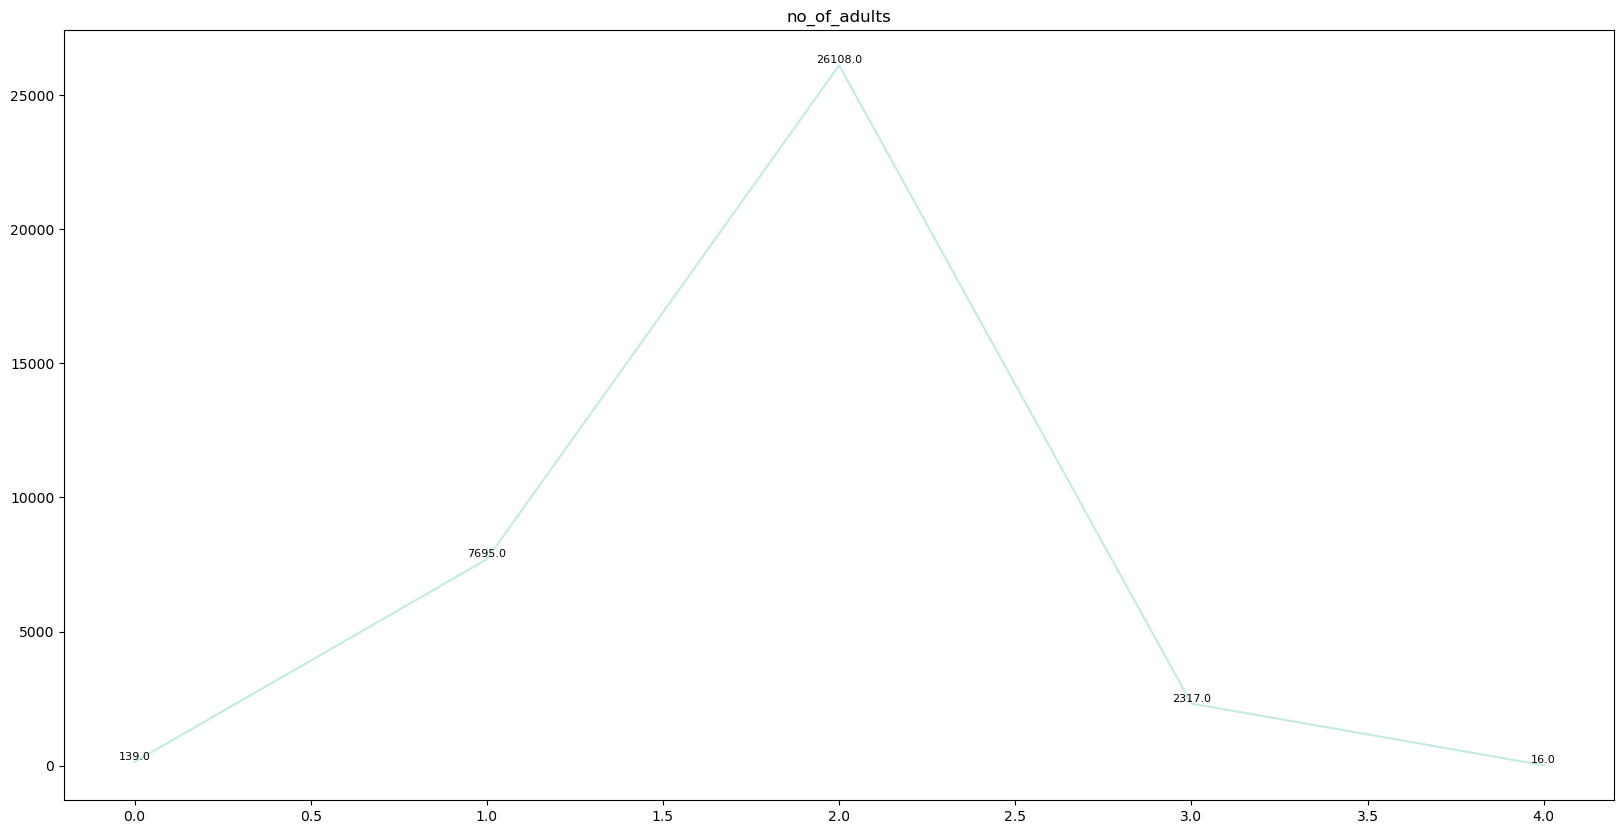

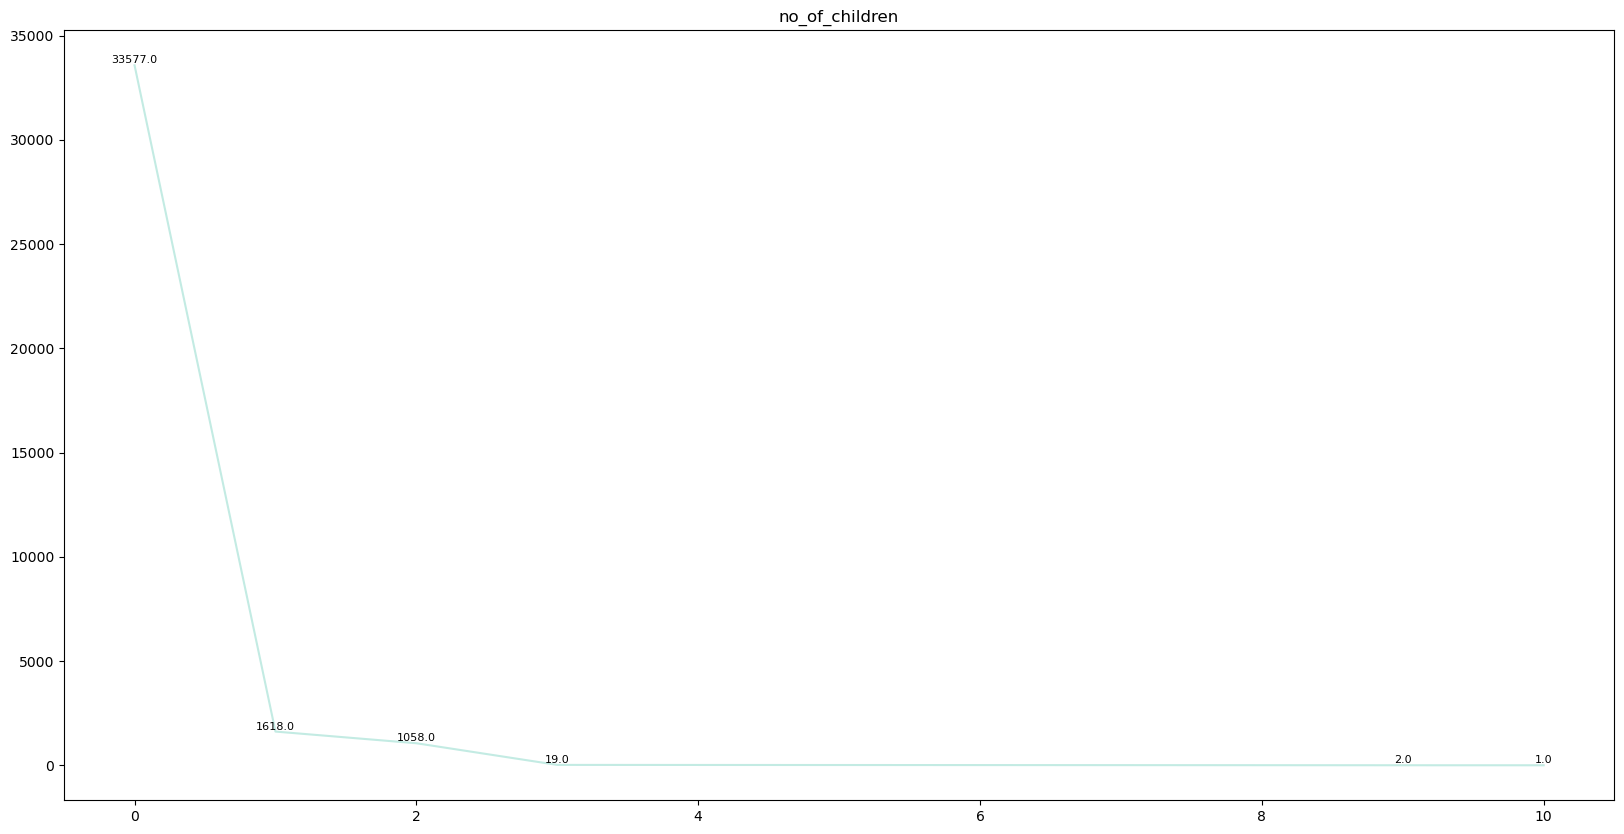

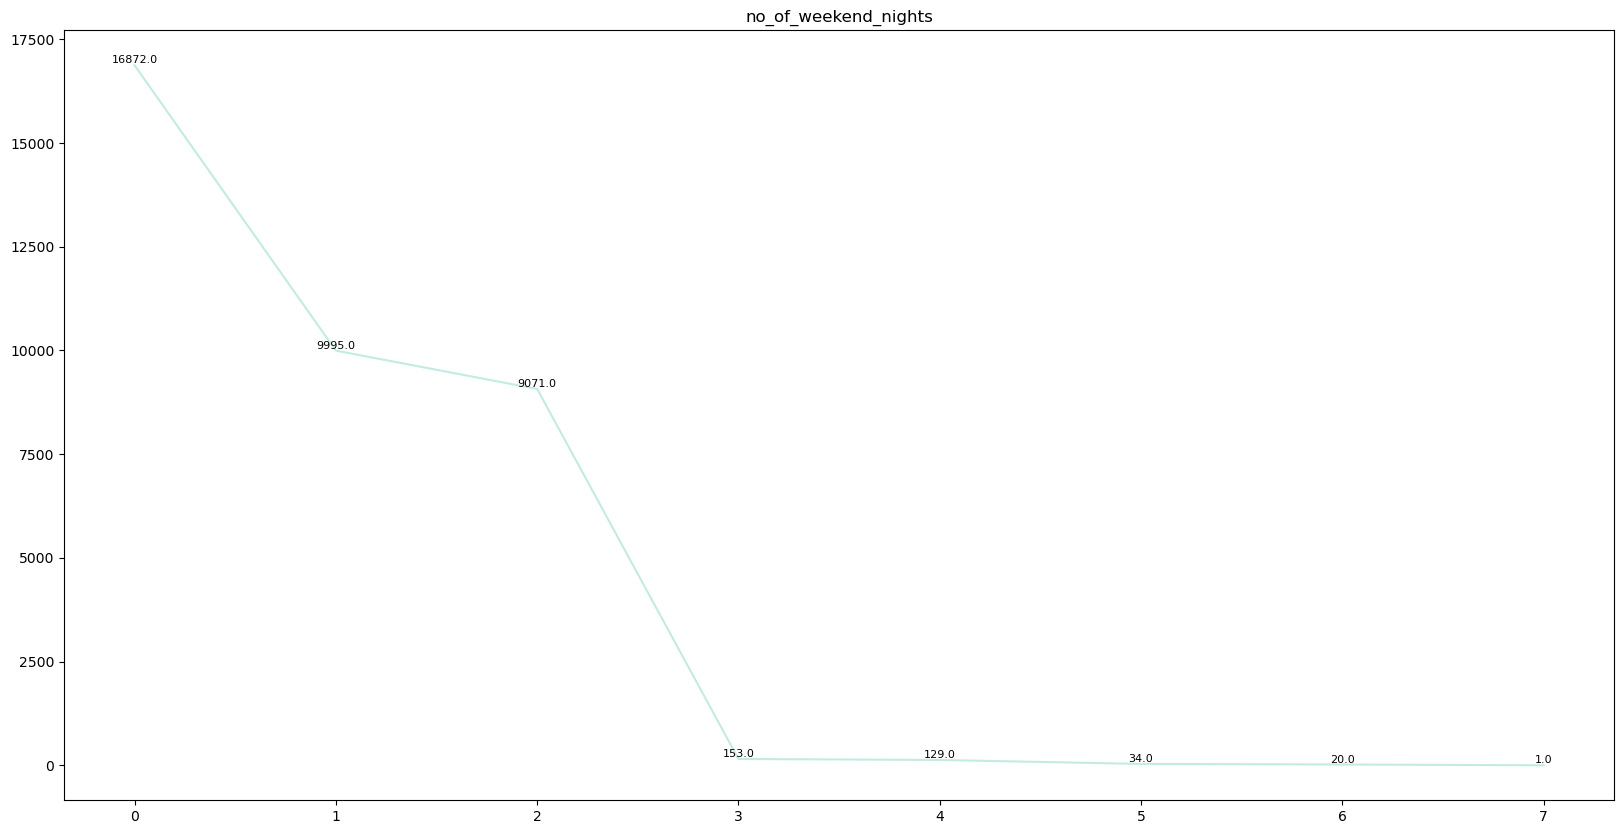

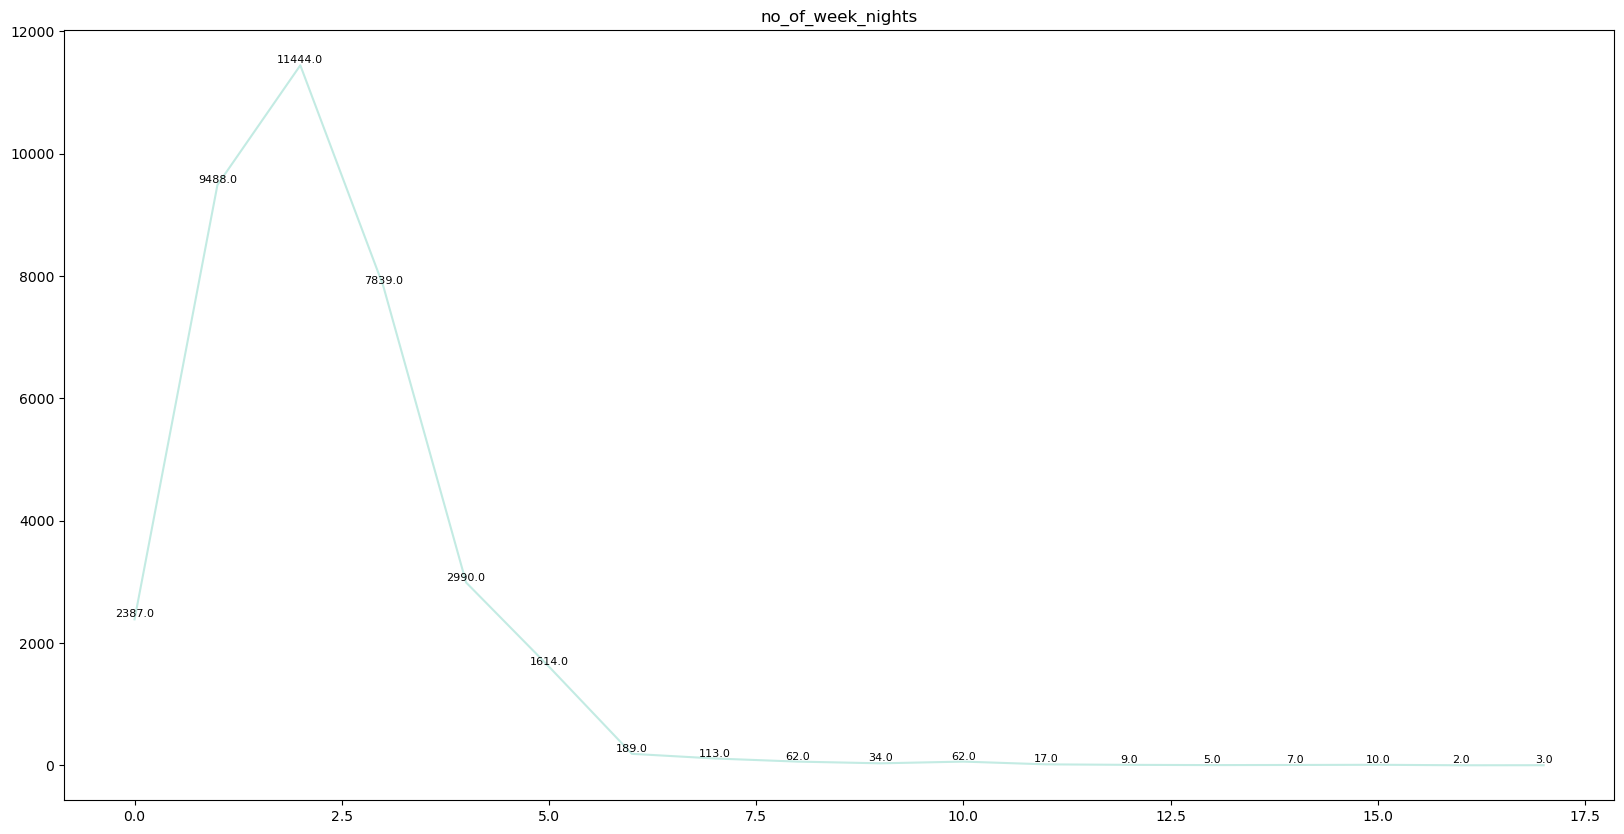

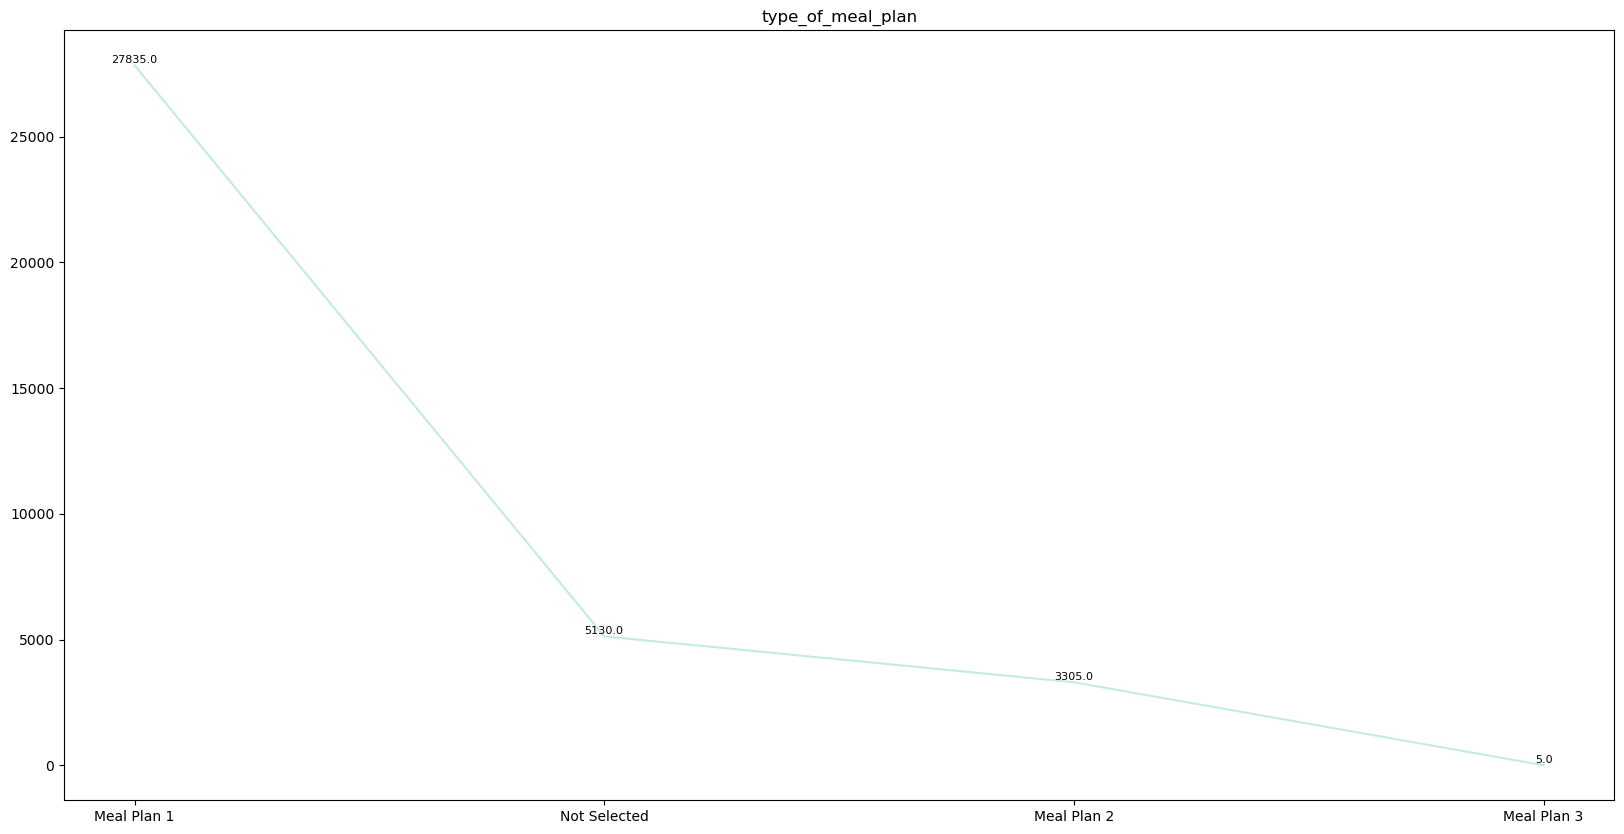

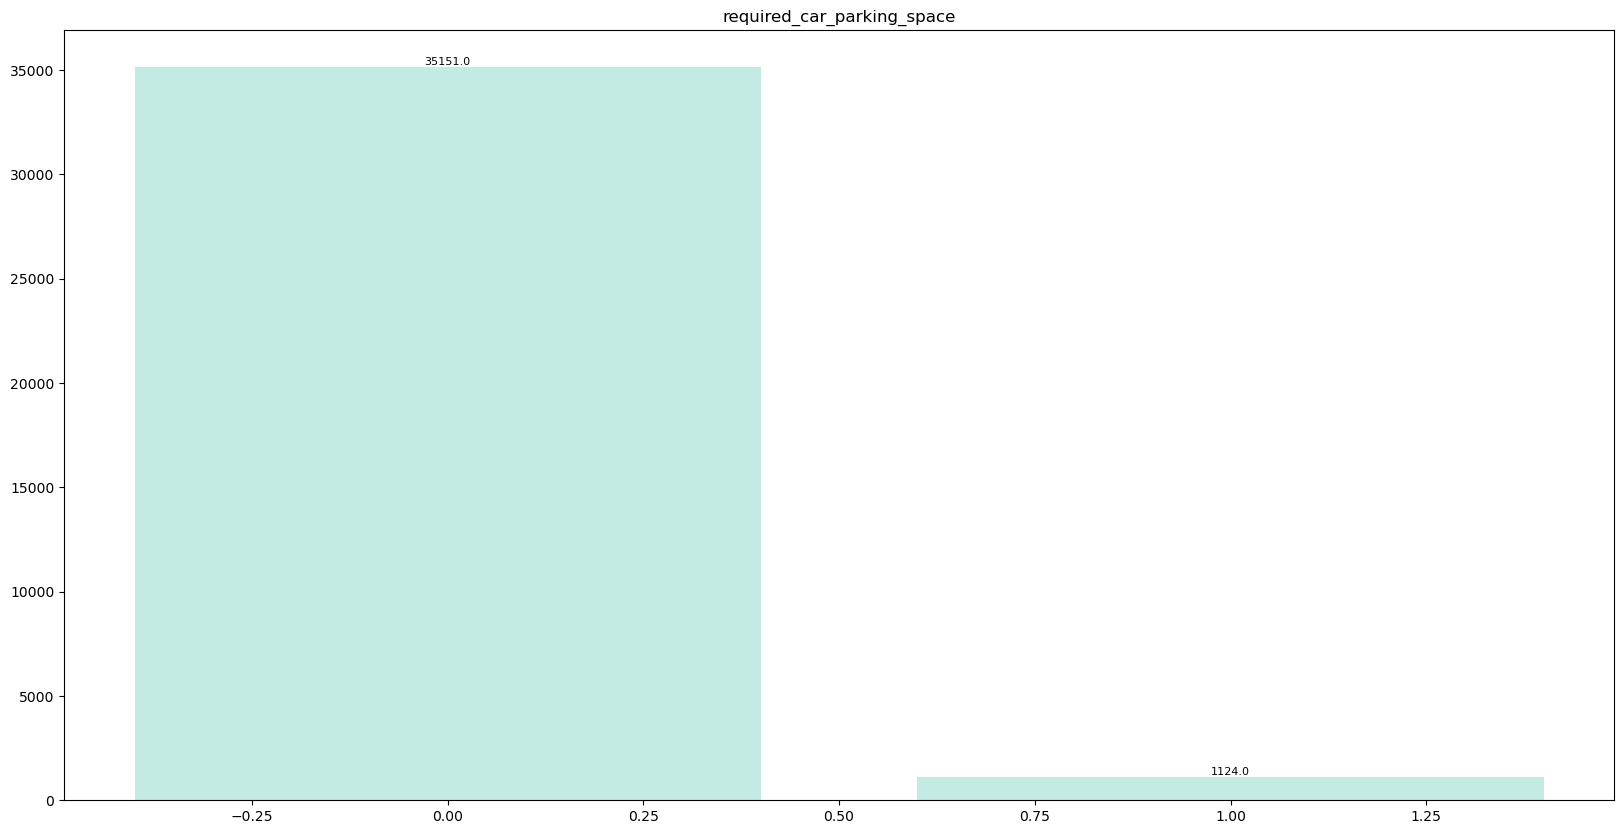

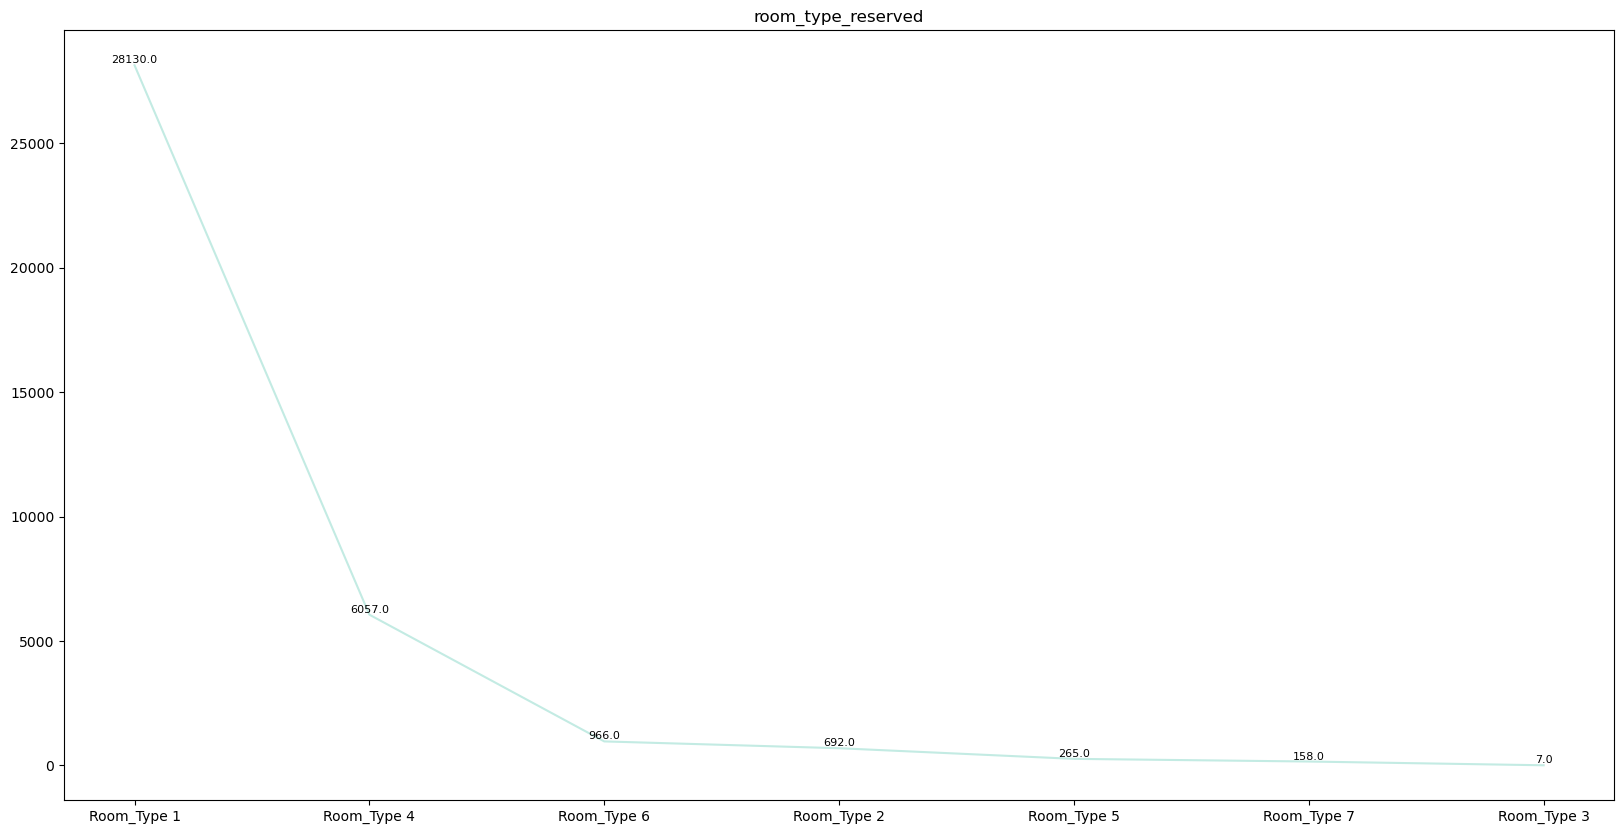

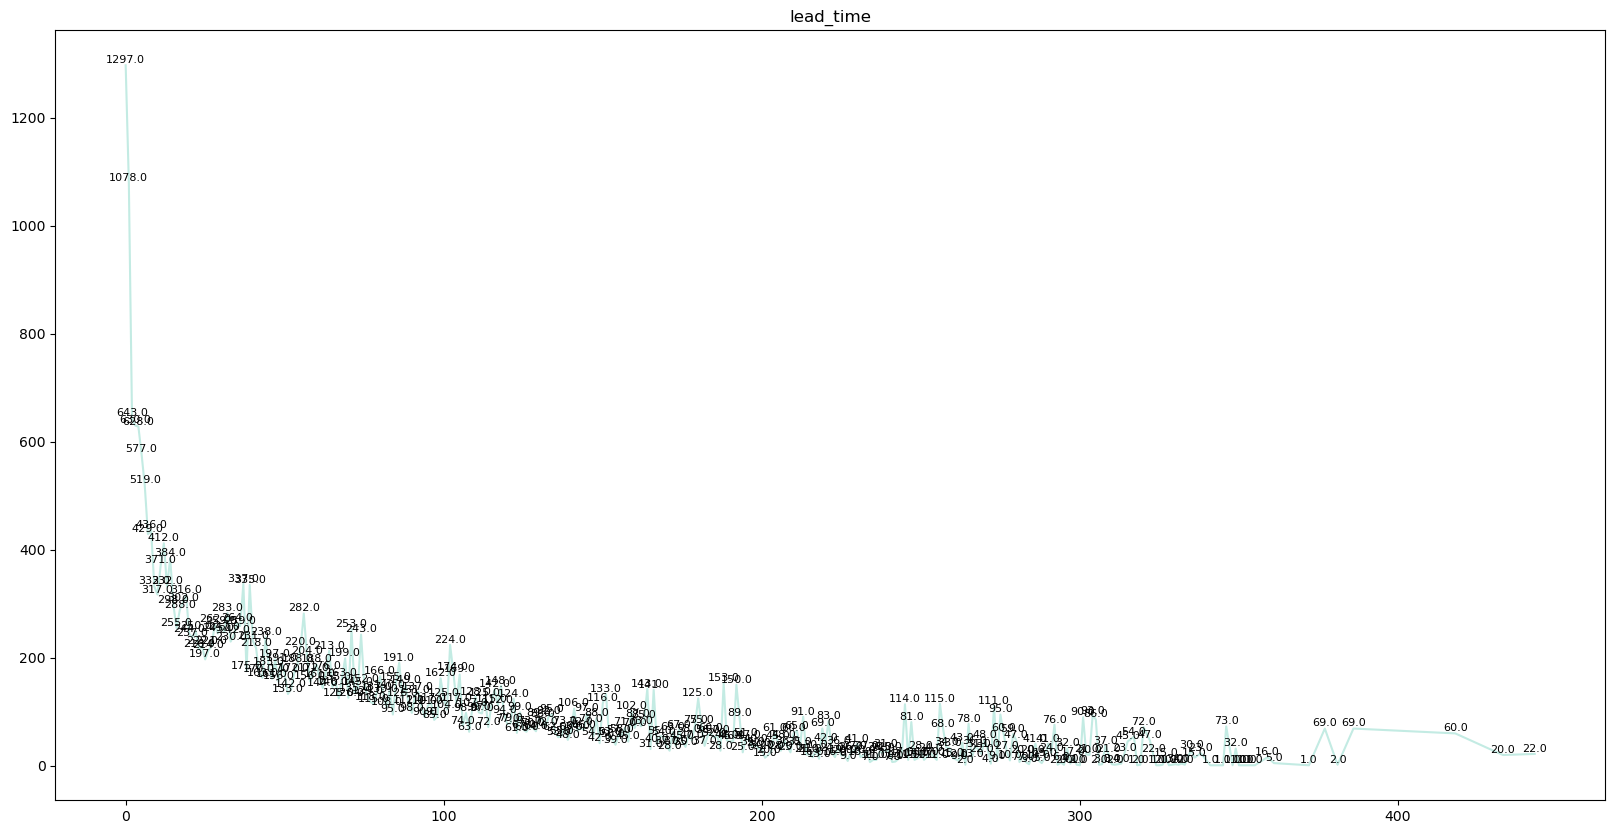

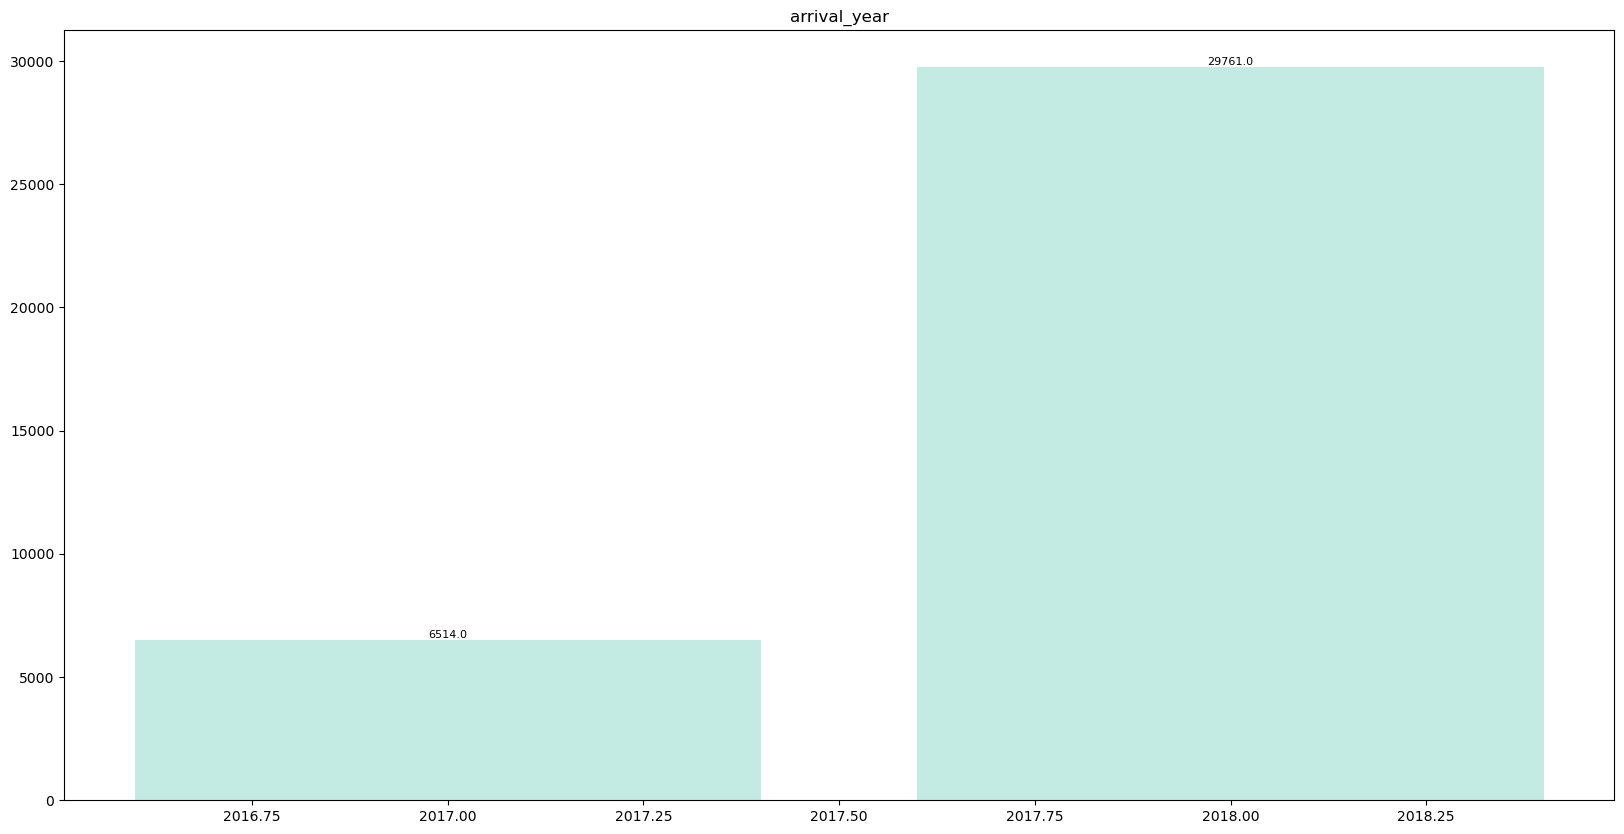

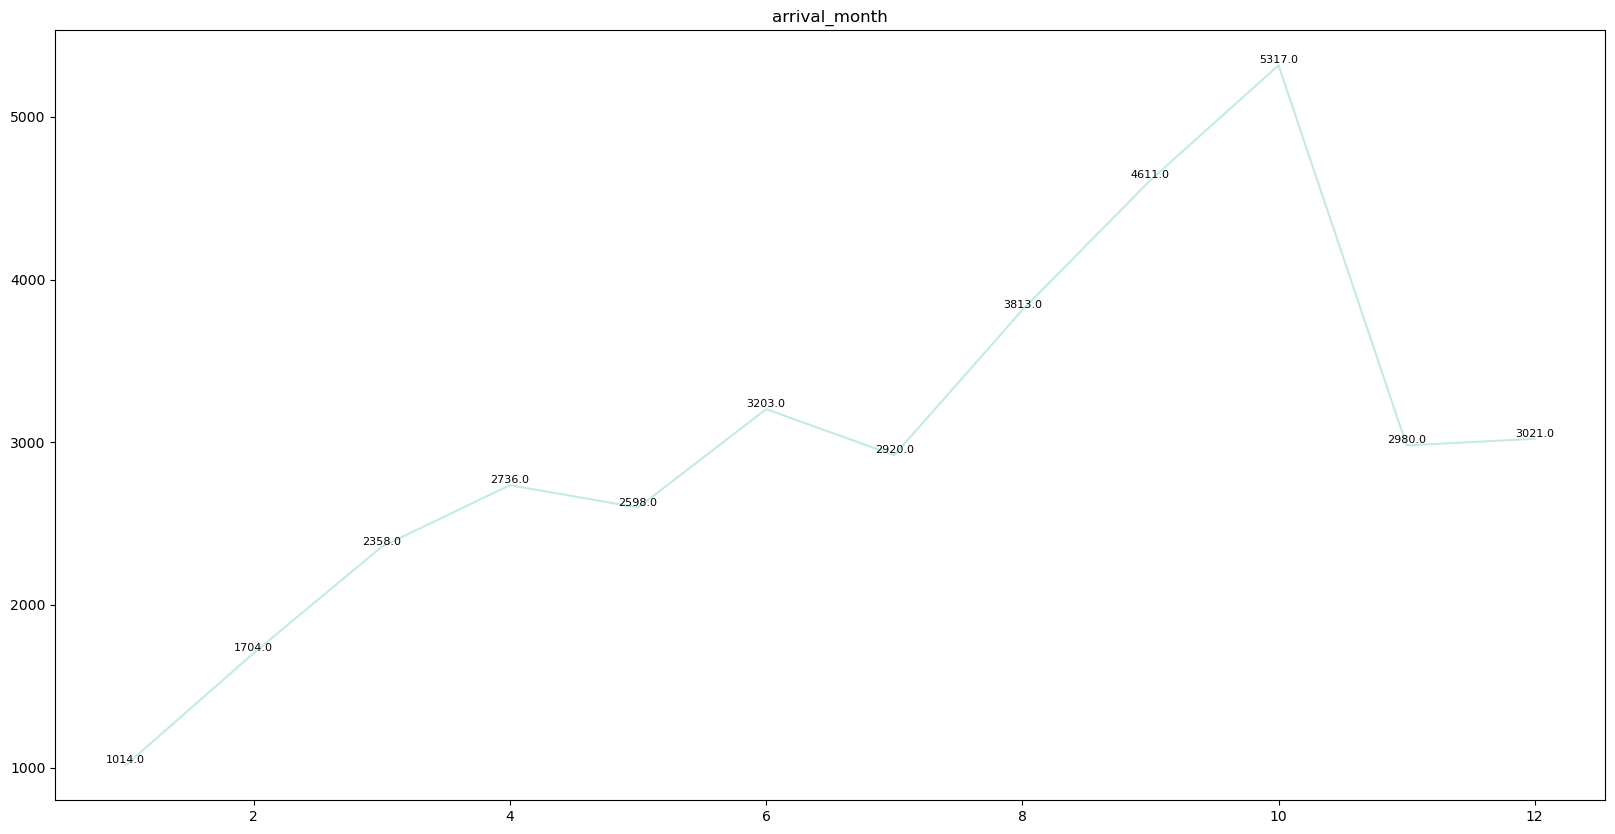

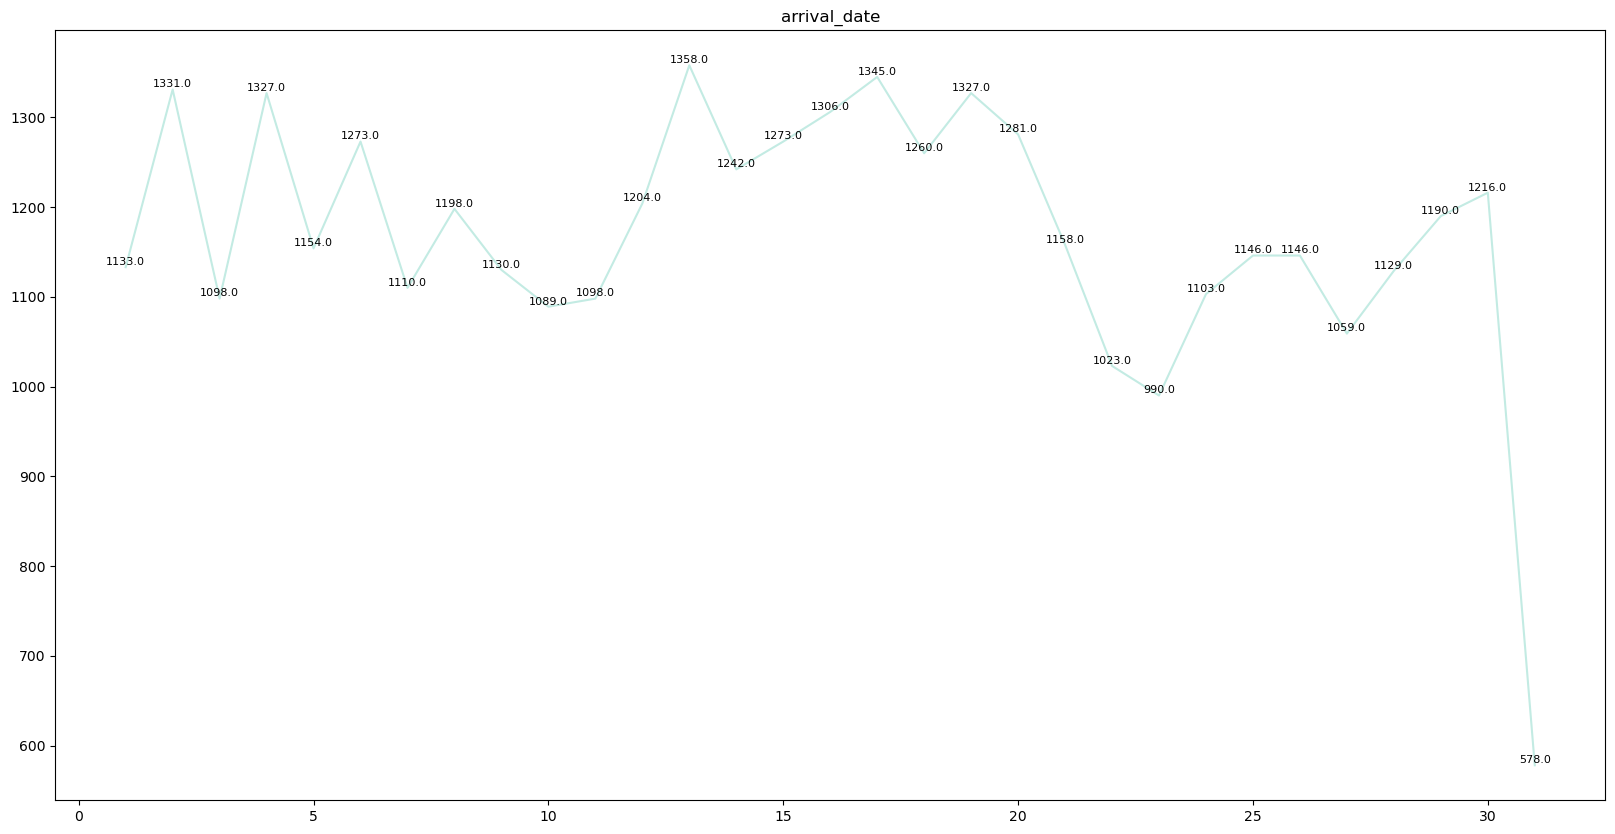

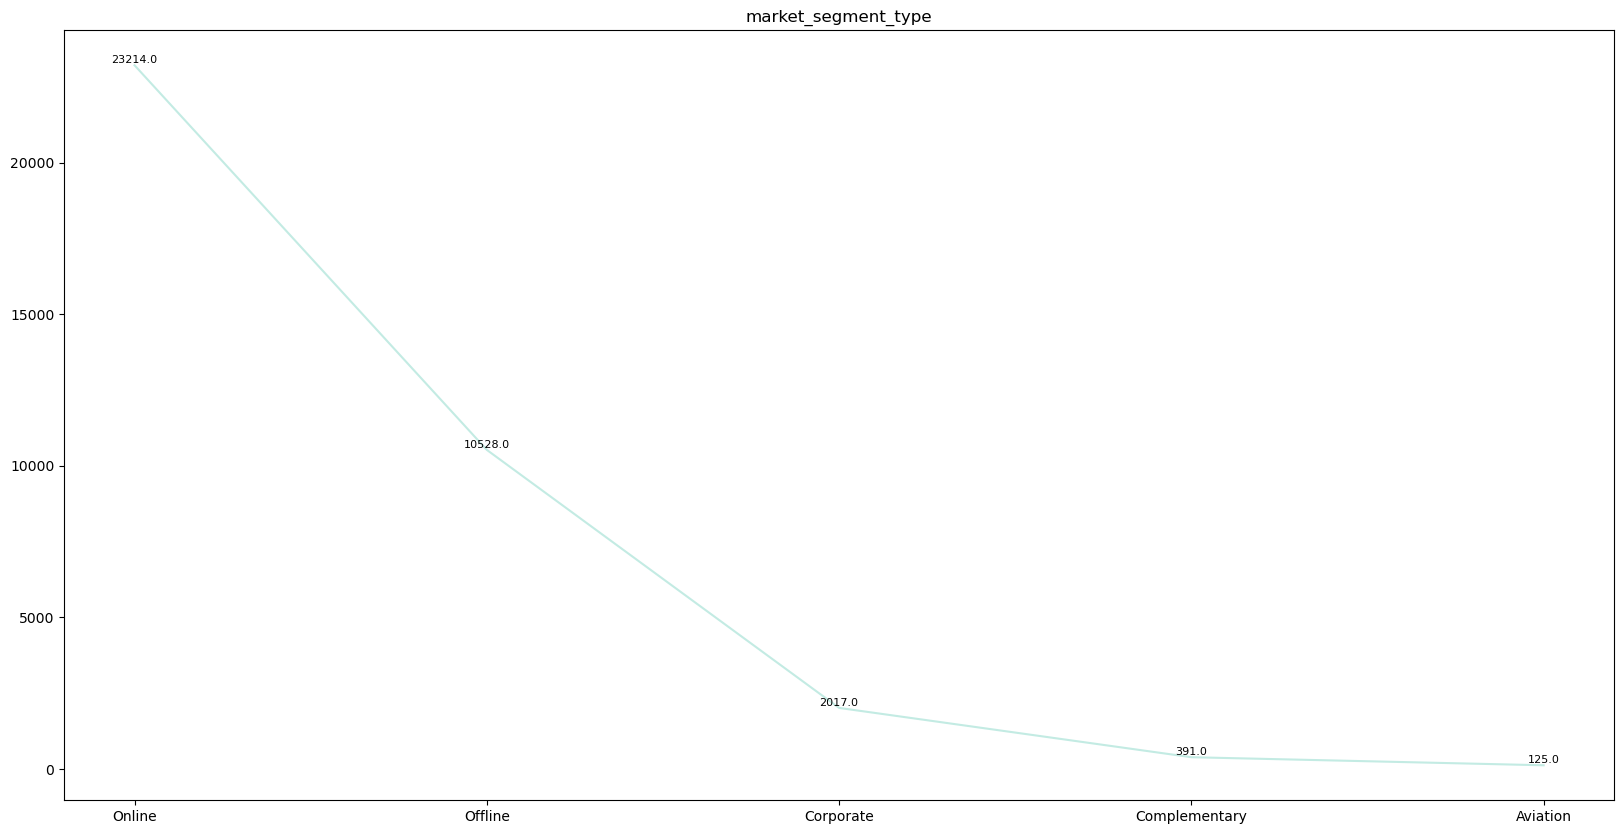

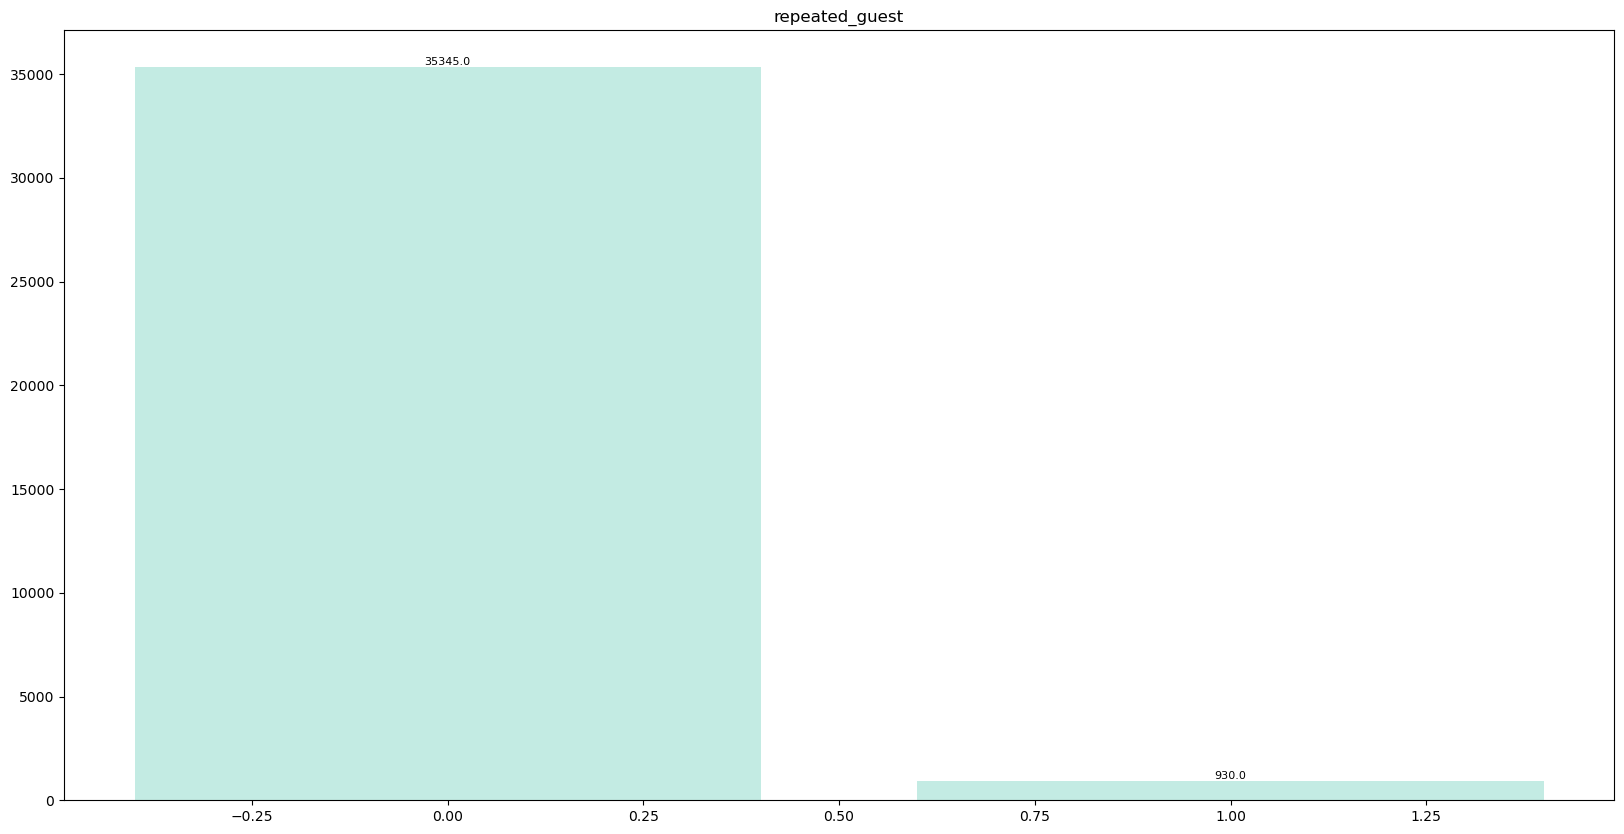

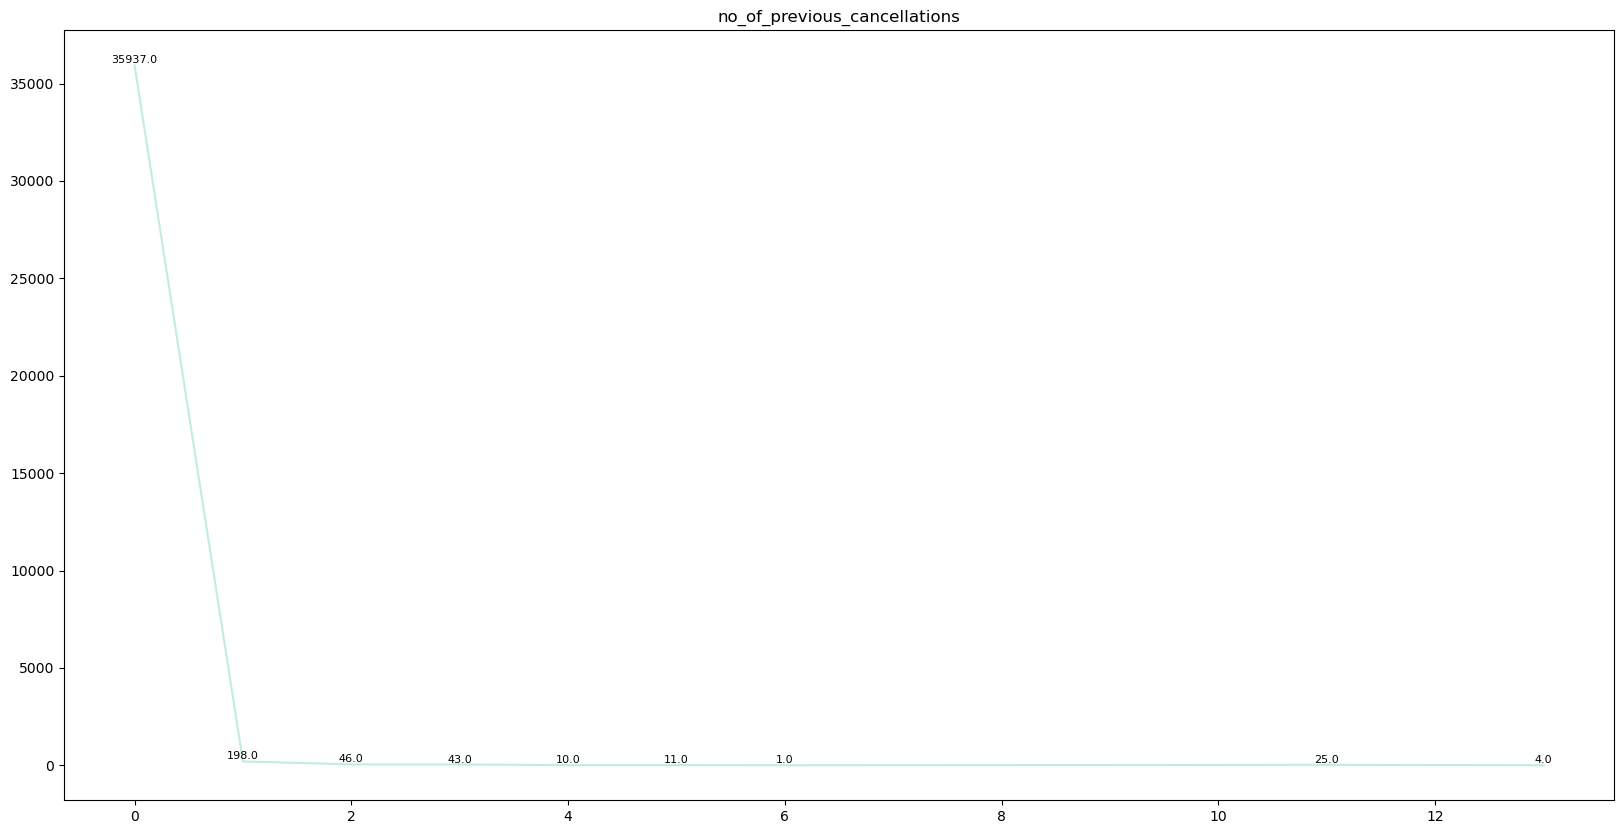

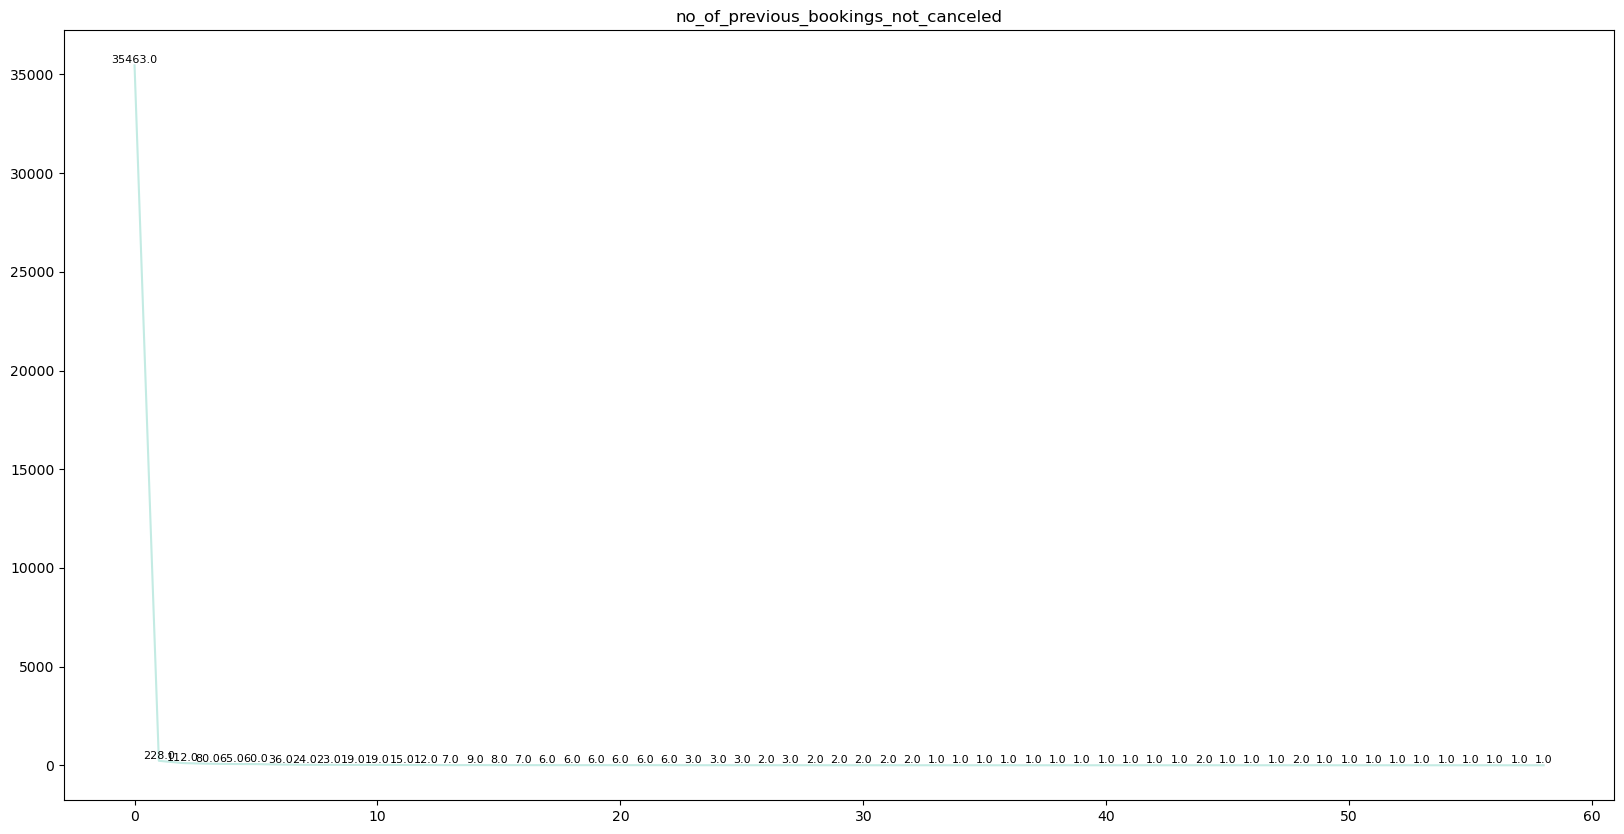

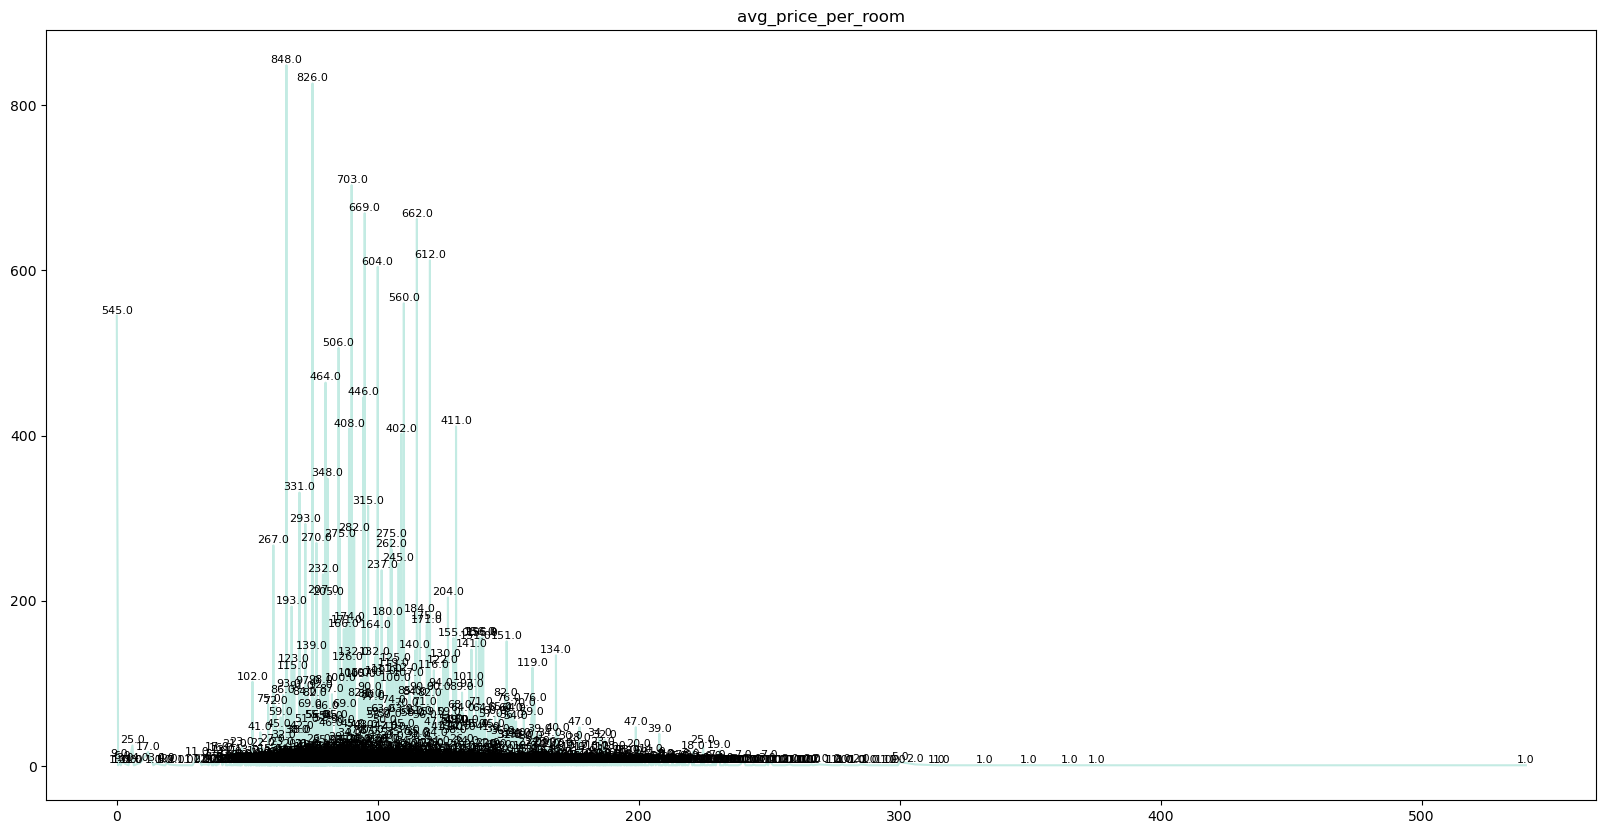

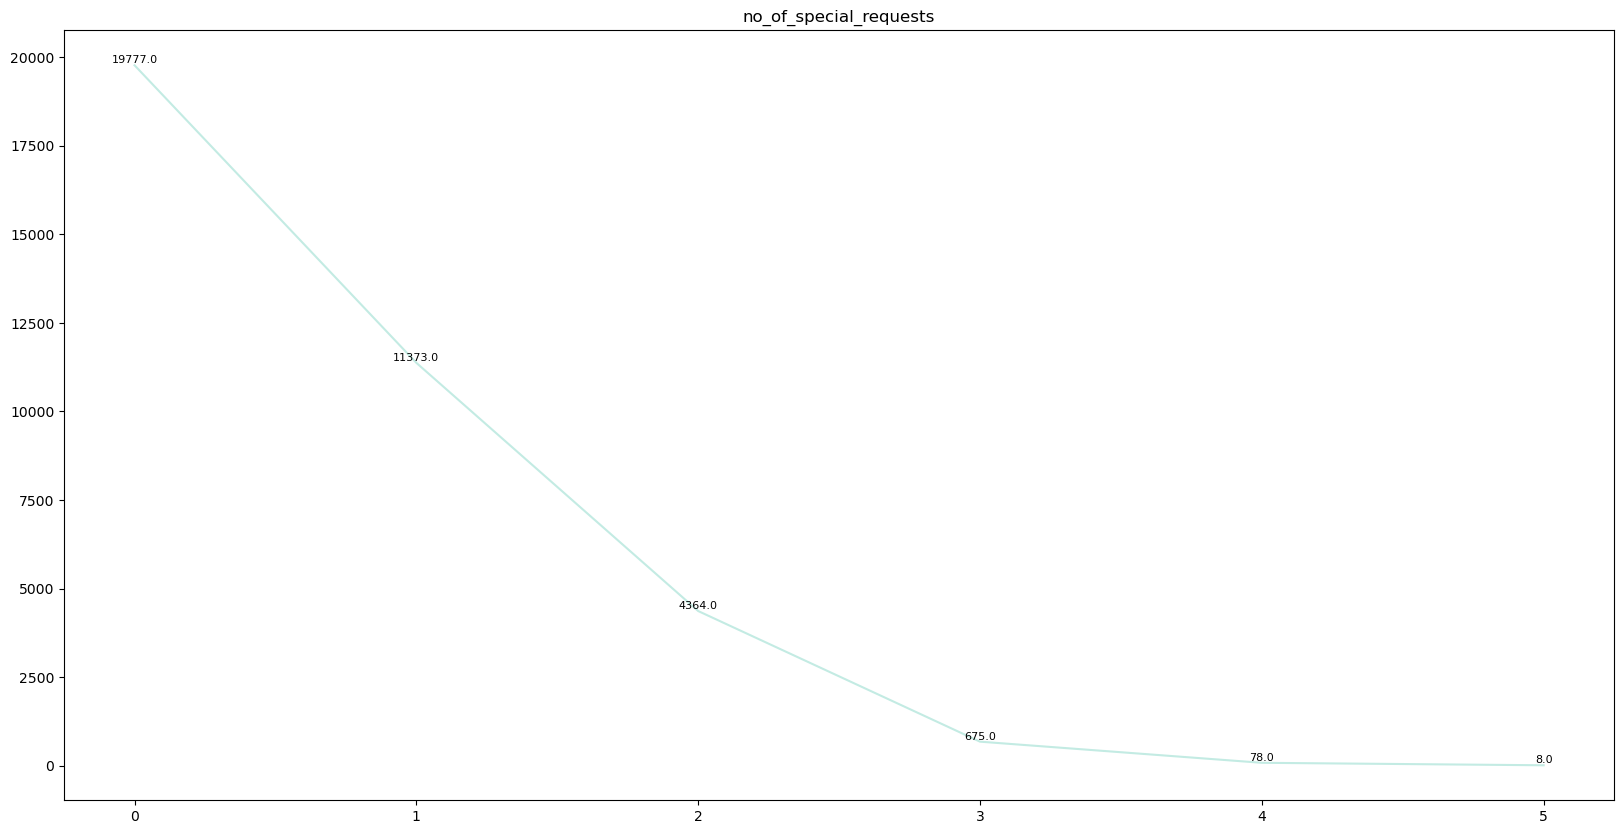

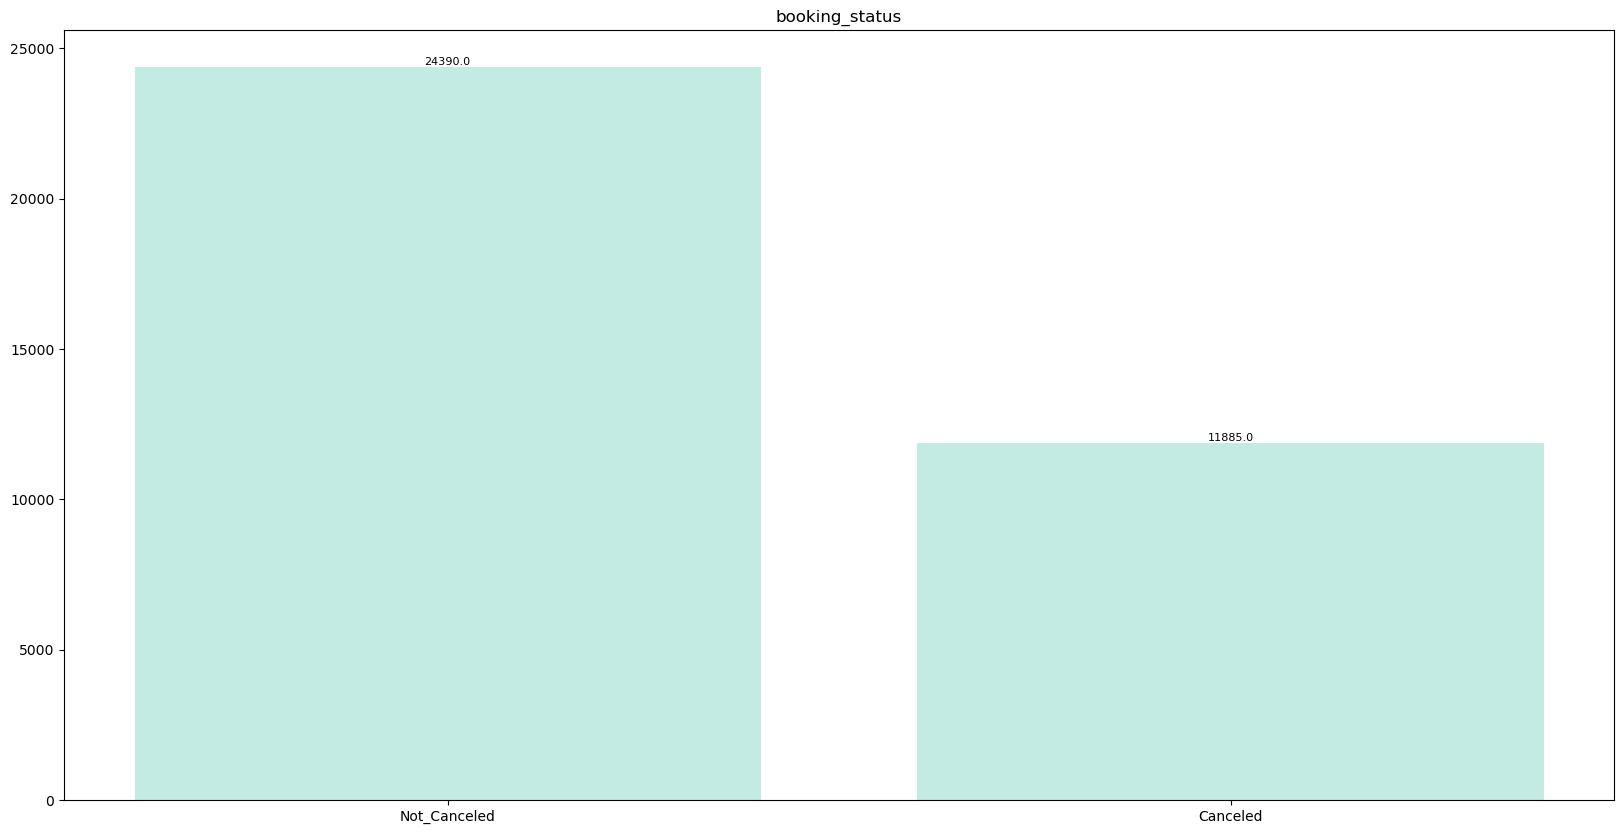

In [44]:
for i in df.columns:
    make_bar_graph(i)

## 객실 당 평균 가격 구체적으로 확인하기

<Axes: xlabel='avg_price_per_room'>

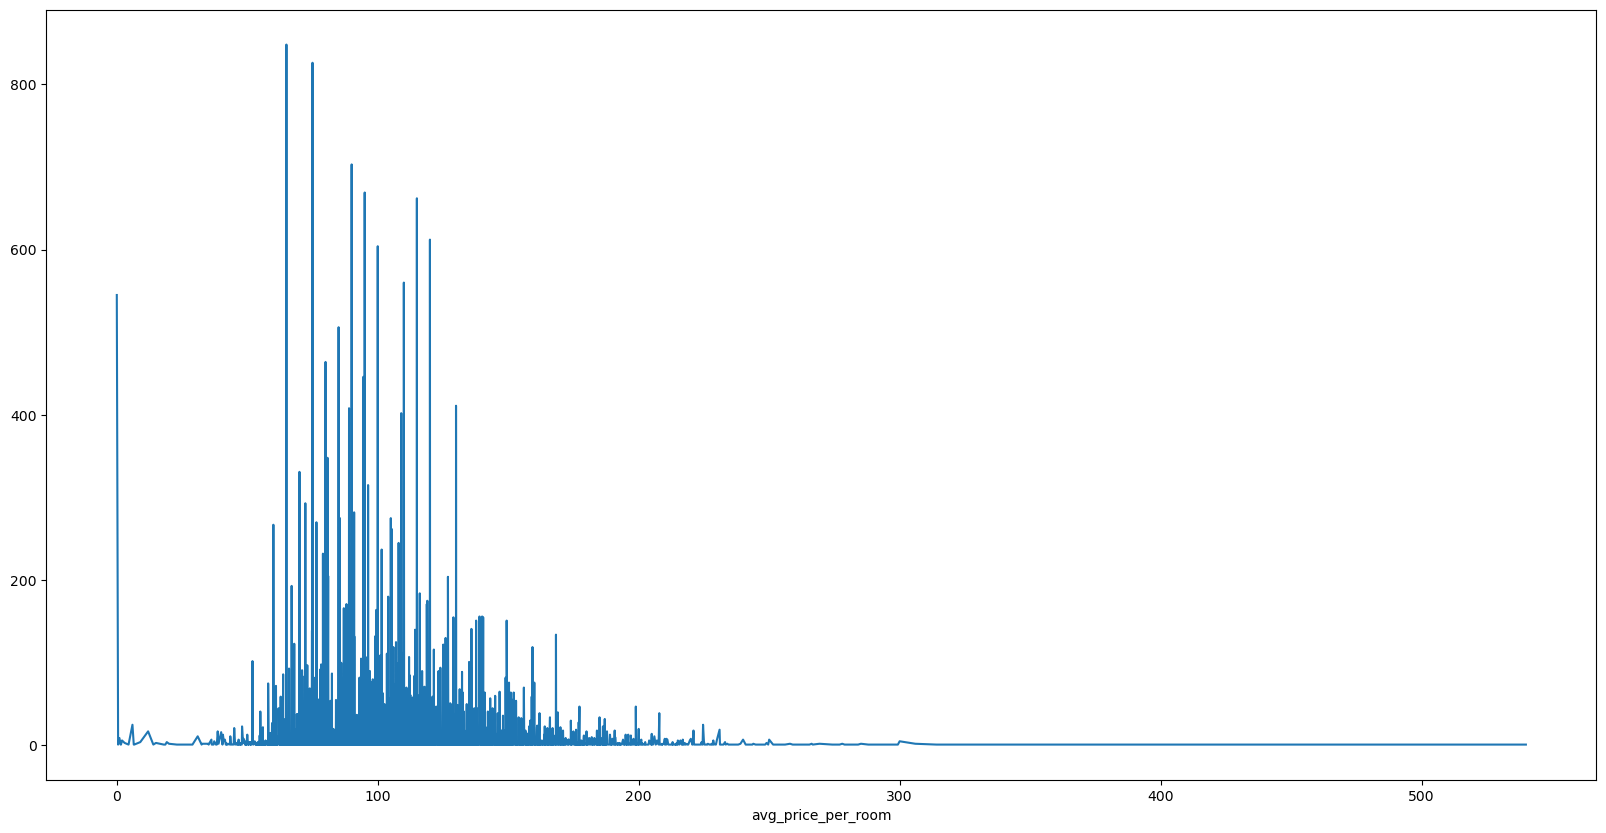

In [45]:
plt.figure(figsize=(20, 10))
df['avg_price_per_room'].value_counts().sort_index().plot()

(0.0, 100.0)

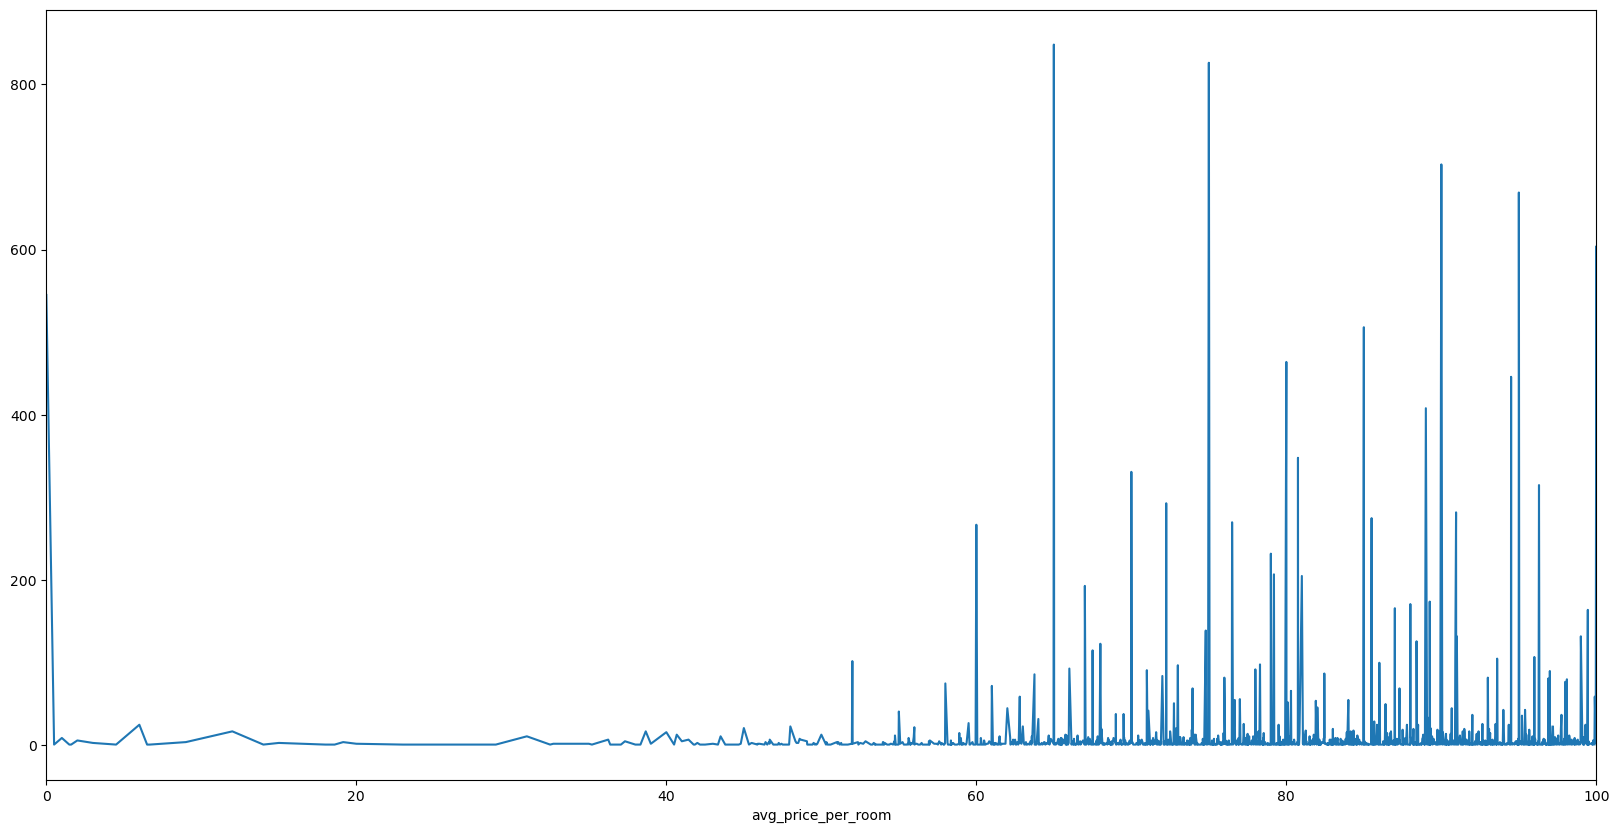

In [46]:
plt.figure(figsize=(20, 10))
df['avg_price_per_room'].value_counts().sort_index().plot()
plt.xlim(0,100)

(100.0, 200.0)

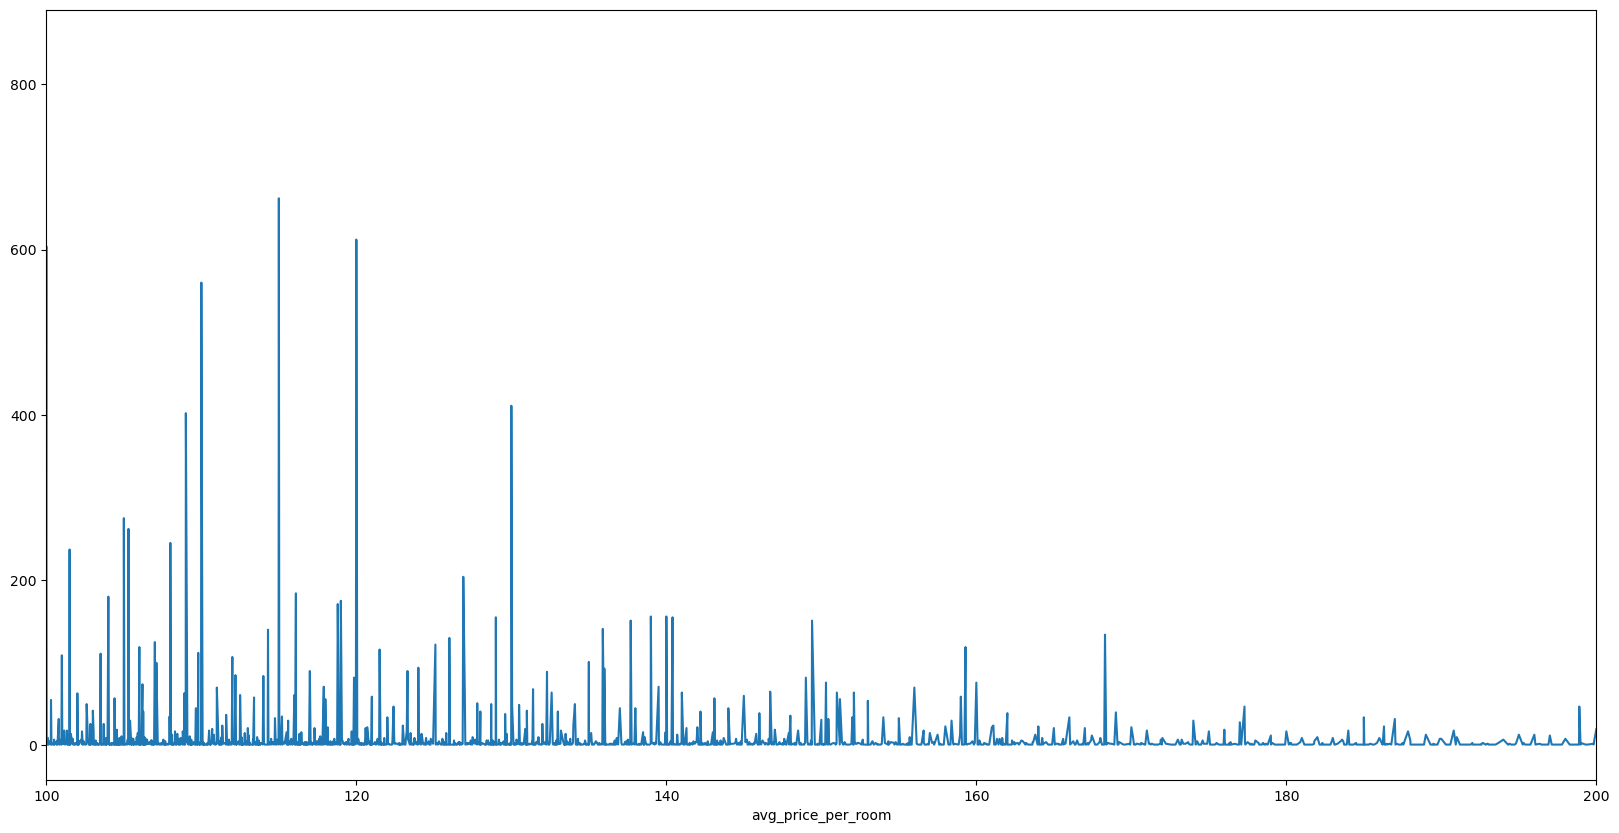

In [47]:
plt.figure(figsize=(20, 10))    
df['avg_price_per_room'].value_counts().sort_index().plot()
plt.xlim(100,200)

(200.0, 567.0)

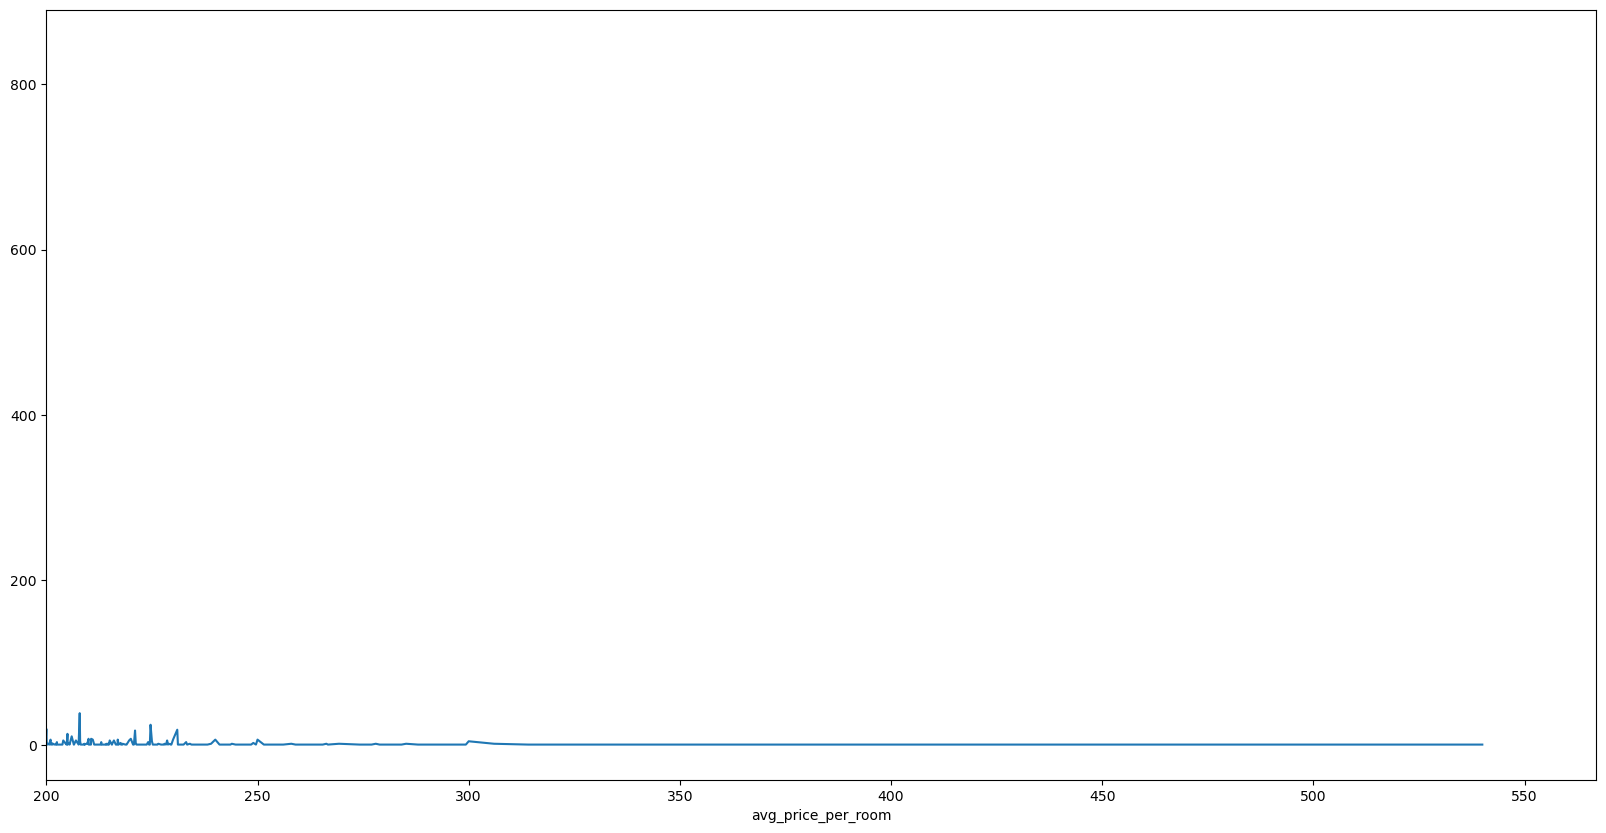

In [48]:
plt.figure(figsize=(20, 10))
df['avg_price_per_room'].value_counts().sort_index().plot()
plt.xlim(200,)

## lead time: 예약일과 숙박일 사이 일수 구체적으로 확인하기 

(0.0, 100.0)

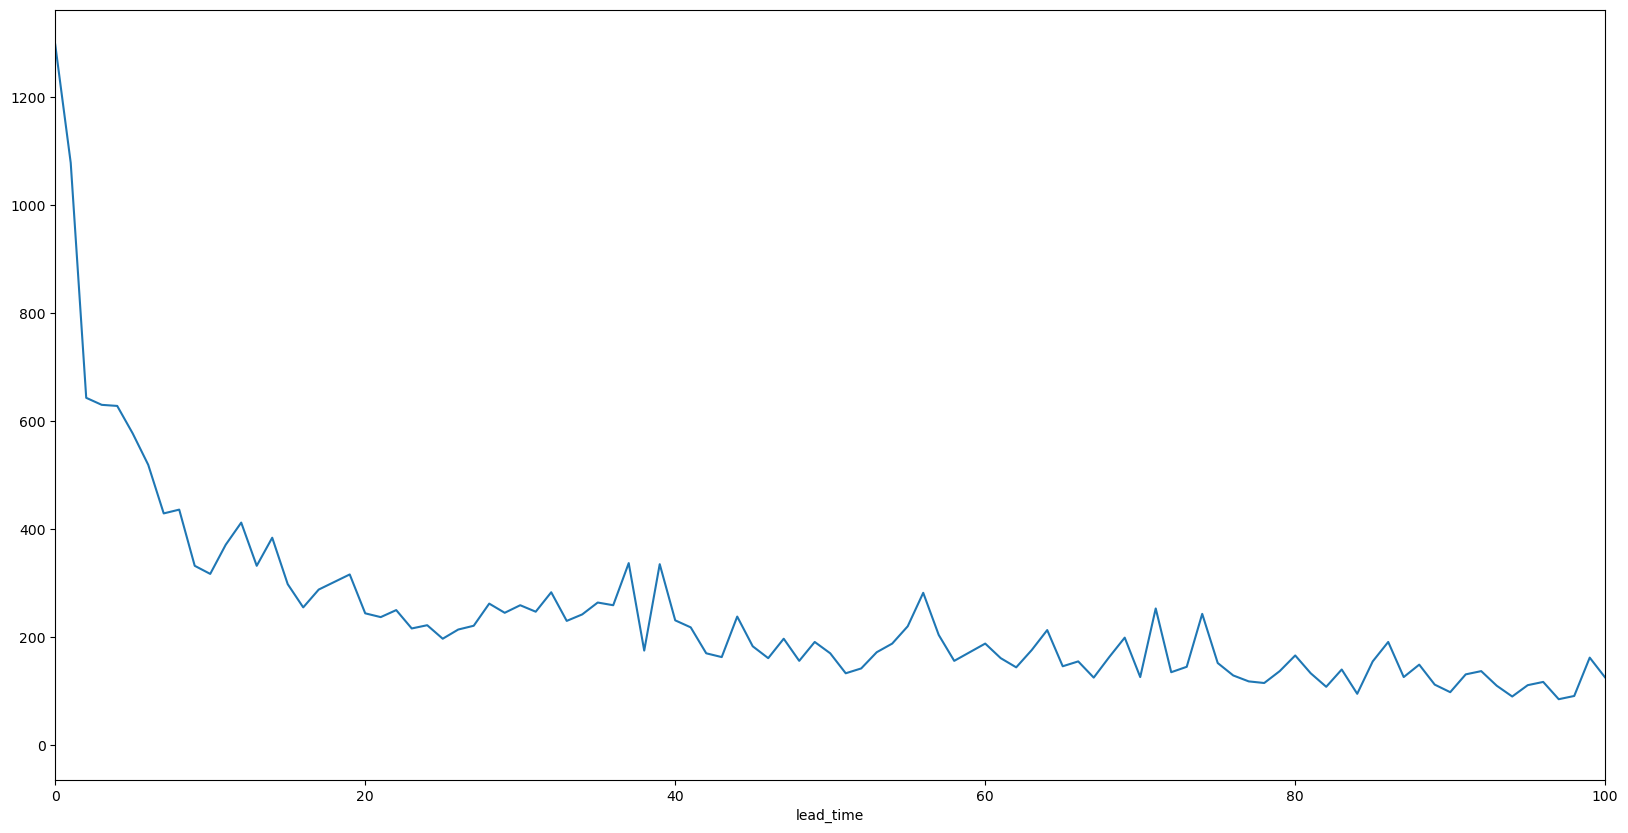

In [49]:
plt.figure(figsize=(20, 10))
df['lead_time'].value_counts().sort_index().plot()
plt.xlim(0,100)

(300.0, 465.15)

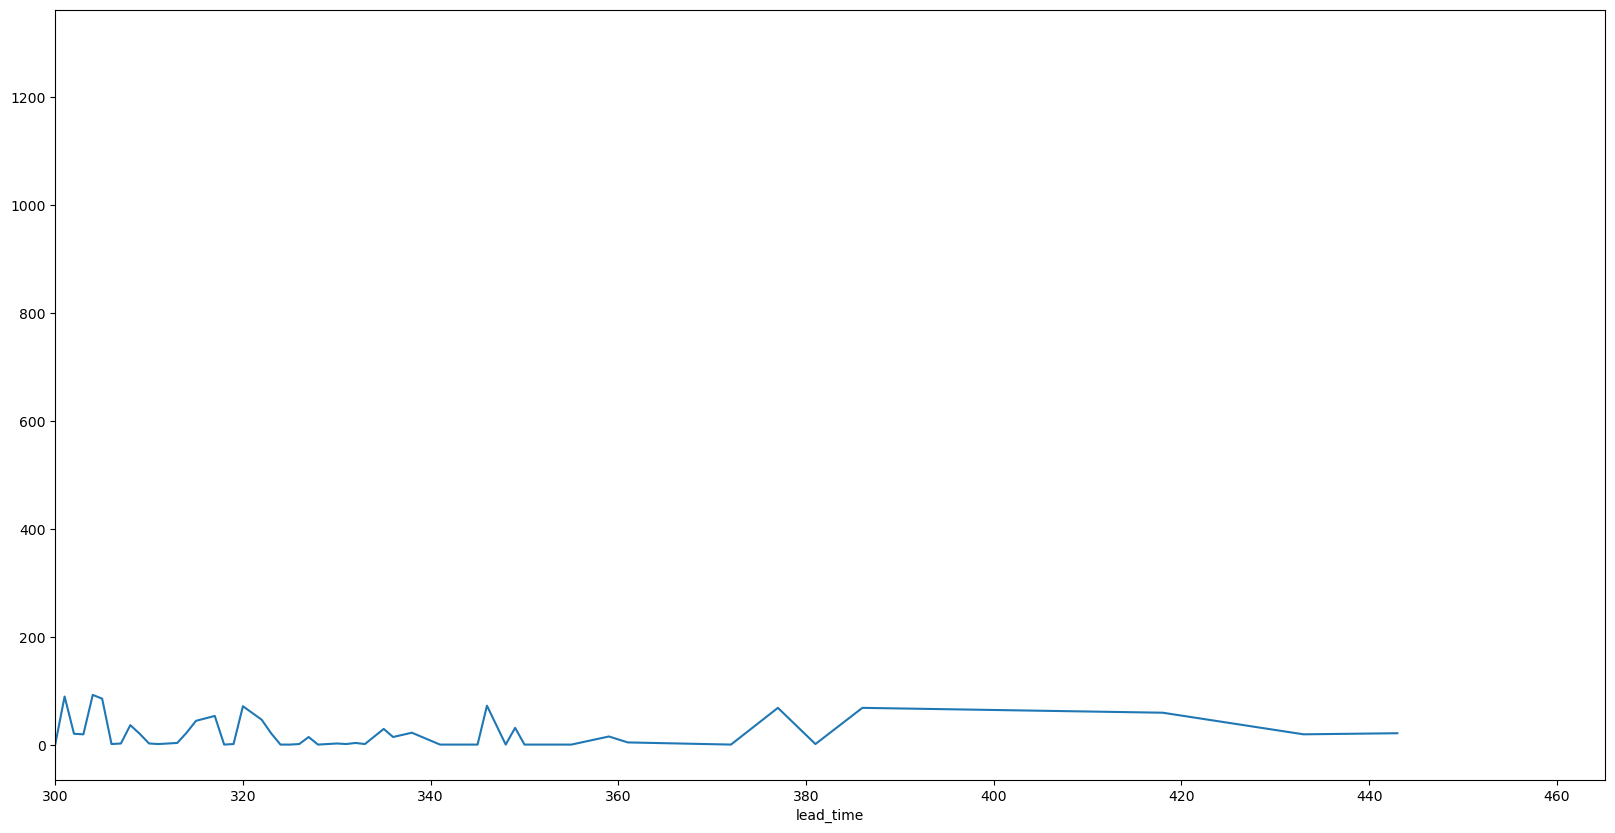

In [50]:
plt.figure(figsize=(20, 10))
df['lead_time'].value_counts().sort_index().plot()
plt.xlim(300,)

## 특정 연월의 방문객 수 확인해보기

In [51]:
df[df['arrival_year']==2017]['arrival_month'].value_counts().sort_index()

arrival_month
7      363
8     1014
9     1649
10    1913
11     647
12     928
Name: count, dtype: int64

In [52]:
df

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


In [76]:
df.dtypes

no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
type_of_meal_plan                        object
required_car_parking_space                int64
room_type_reserved                       object
lead_time                                 int64
arrival_year                              int64
arrival_month                             int64
arrival_date                              int64
market_segment_type                      object
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
booking_status                           object
dtype: object

In [82]:
import plotly.express as px

fig = px.scatter(
    data_frame=df[df['arrival_year']==2017],
    x='avg_price_per_room',
    y='lead_time',
    size='lead_time',
    color='arrival_month',
    hover_name='arrival_date',
    size_max=100
)
fig.show()

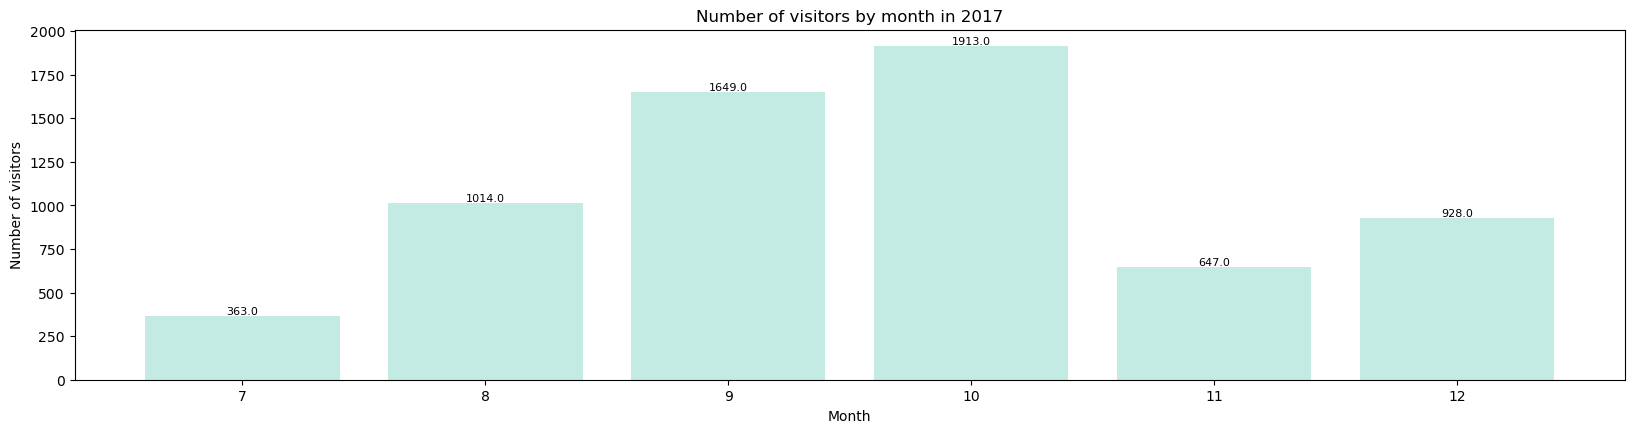

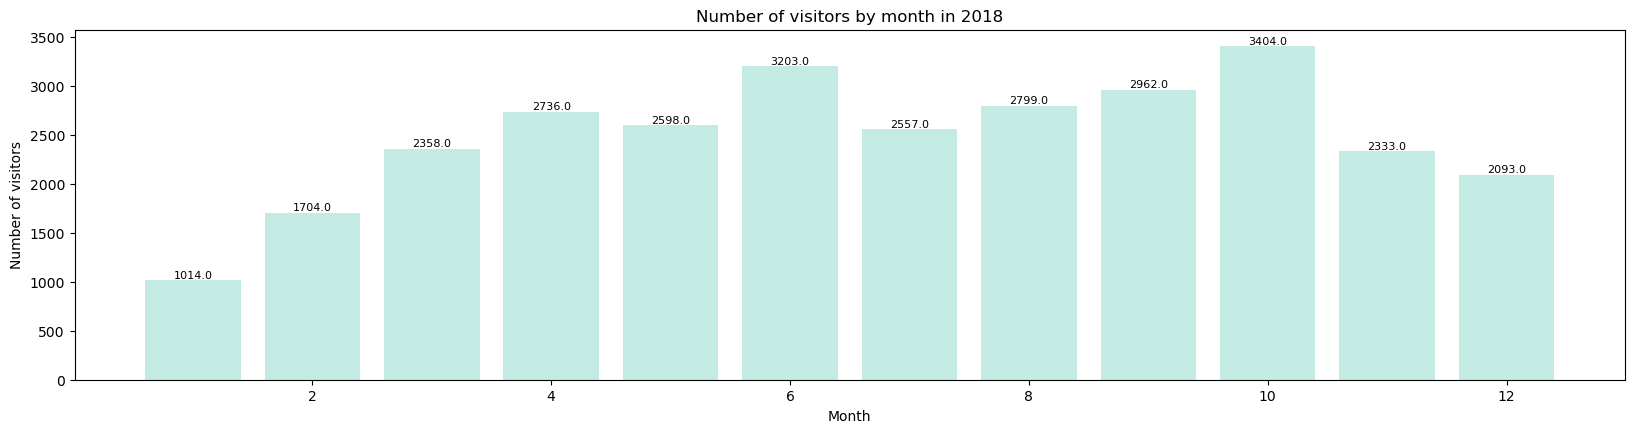

In [54]:
for i in [2017, 2018]:
    x= df[df['arrival_year']==i]['arrival_month'].value_counts().sort_index().index
    y= df[df['arrival_year']==i]['arrival_month'].value_counts().sort_index().values
    plt.figure(figsize=(20, 10))
    plt.subplot(2, 1, i-2016)
    plt.xlabel('Month')
    plt.ylabel('Number of visitors')
    plt.title('Number of visitors by month in ' + str(i))
    for j in range(len(x)):
        height = y[j]
        plt.text(x[j], height + 0.25, '%.1f' %height, ha='center', va='bottom', size=8)
    plt.bar(x, y, color='#C3EBE3')

## 구매 경로
### 2017, 2018 년도별 bar, pie 그래프

In [55]:
mst = pd.DataFrame()
mst.insert(0, '2017', df[df['arrival_year']==2017]['market_segment_type'].value_counts().values)
mst.insert(0, '2018', df[df['arrival_year']==2018]['market_segment_type'].value_counts().values[:4])
mst_index = ['Online', 'Offline', 'Corporate', 'Comlementary']
mst.drop
mst.insert(0, 'type', mst_index)

In [56]:
mst.set_index('type', inplace=True)
mst

,2018,2017
type,,
Online,20263,2951
Offline,7602,2926
Corporate,1519,498
Comlementary,252,139


### Bar Graph

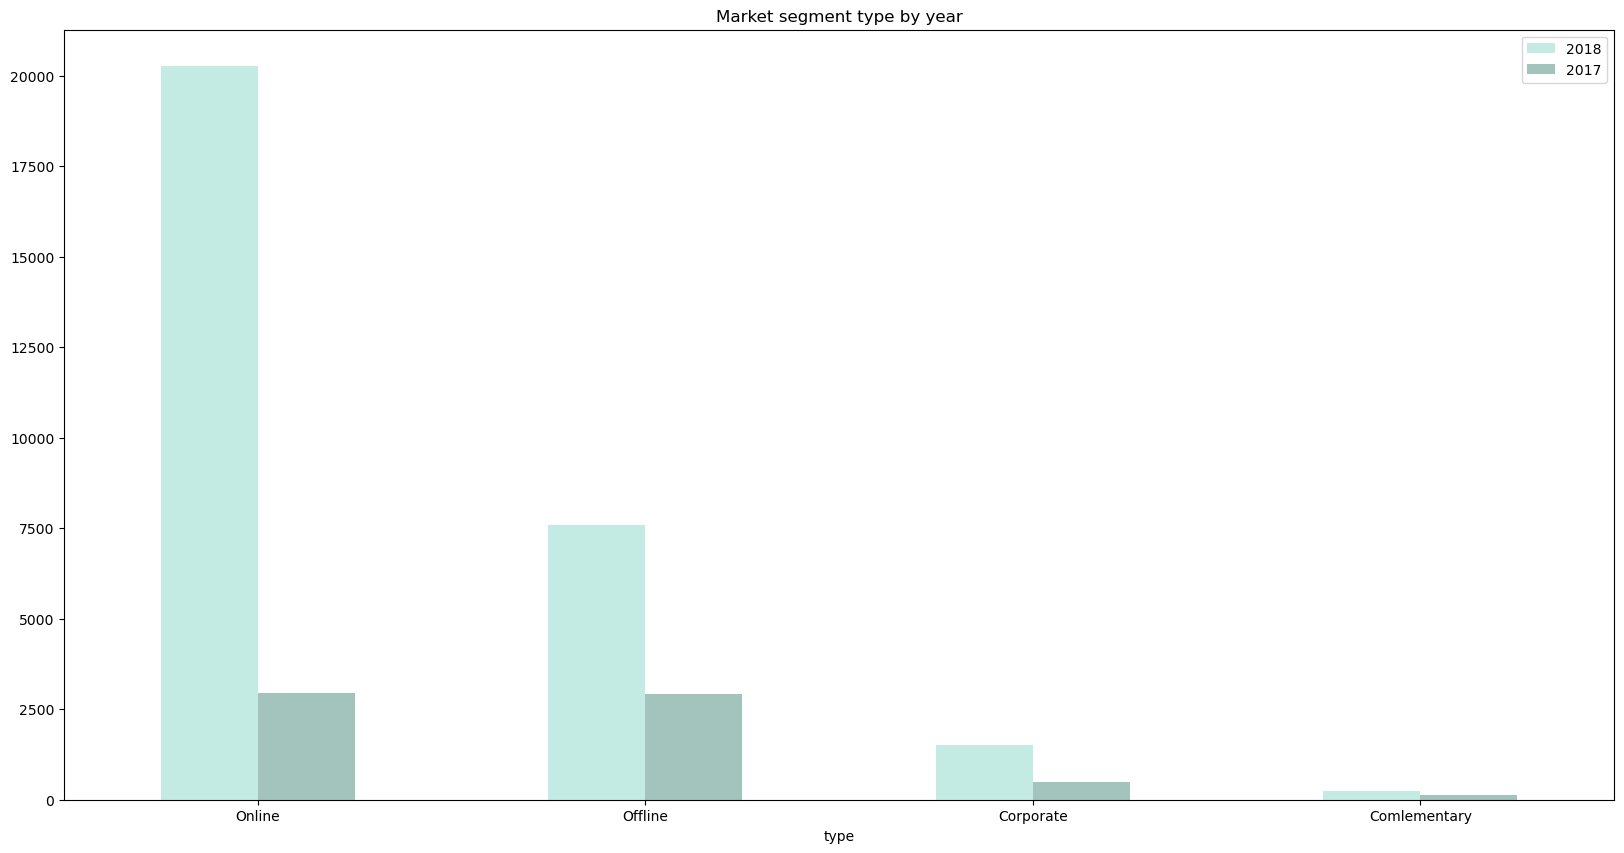

In [57]:
mst.plot(kind='bar', figsize=(20, 10), rot=0, color=['#C3EBE3', '#A3C4BC'])
plt.title('Market segment type by year')
plt.legend()
plt.show()

### Pie Graph

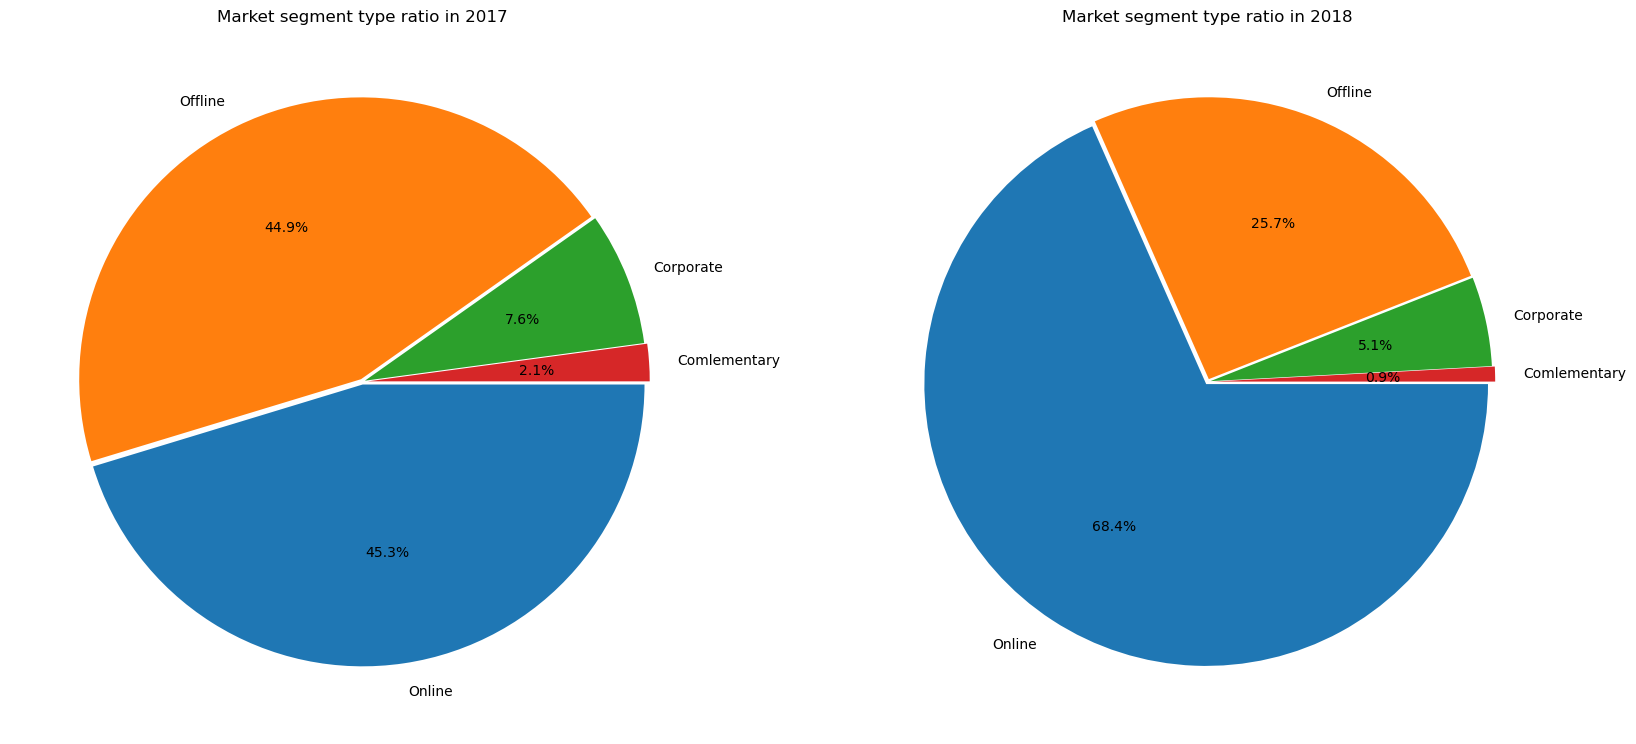

In [58]:
plt.figure(figsize=(20, 20))
for i in [2017, 2018]:
    ratio = mst[str(i)]
    plt.subplot(1, 2, i-2016)
    plt.title('Market segment type ratio in ' + str(i))
    plt.pie(ratio, labels=mst_index, autopct='%.1f%%', counterclock=False, explode=(0.01, 0.01, 0.01, 0.02))

In [59]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


## lead time(예약일과 숙박일 차이) 을 기준으로 한 취소 패턴과 취소율

In [60]:
canceled_bookings = df[df['booking_status']=='Canceled']
not_canceled_bookings = df[df['booking_status']=='Not_Canceled']
canceled_bookings

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
5,2,0,0,2,Meal Plan 2,0,Room_Type 1,346,2018,9,13,Online,0,0,0,115.00,1,Canceled
12,2,0,2,1,Not Selected,0,Room_Type 1,30,2018,11,26,Online,0,0,0,88.00,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36267,2,0,1,0,Not Selected,0,Room_Type 1,49,2018,7,11,Online,0,0,0,93.15,0,Canceled
36268,1,0,0,3,Meal Plan 1,0,Room_Type 1,166,2018,11,1,Offline,0,0,0,110.00,0,Canceled
36269,2,2,0,1,Meal Plan 1,0,Room_Type 6,0,2018,10,6,Online,0,0,0,216.00,0,Canceled
36271,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled


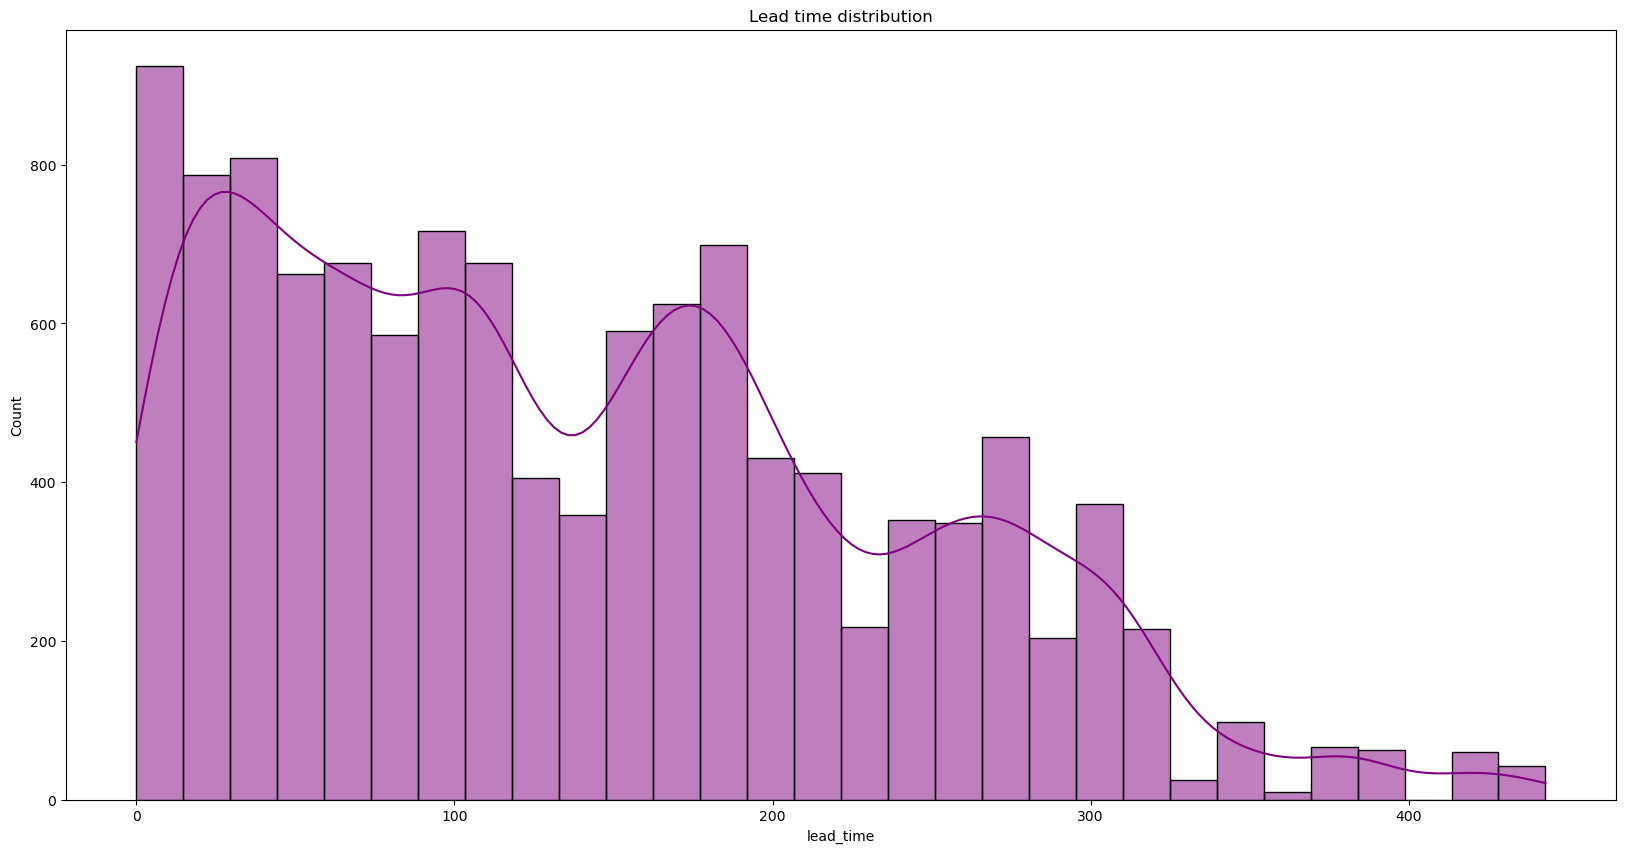

In [61]:
plt.figure(figsize=(20, 10))
sns.histplot(canceled_bookings['lead_time'], bins=30, color='Purple', kde=True)
plt.title('Lead time distribution')
plt.show()  

In [62]:
total_canceled = len(canceled_bookings)
total_booking = len(df)
cancellation_rate = (total_canceled / total_booking) * 100

In [63]:
cancellation_rate

32.76361130254997

## Lead time 과 객실 평균 가격의 관계(취소 여부)
방이 비싸고 예약일과 숙박일 사이가 멀수록, 취소될 가능성이 높다

Text(37.597222222222214, 0.5, 'Average price per room')

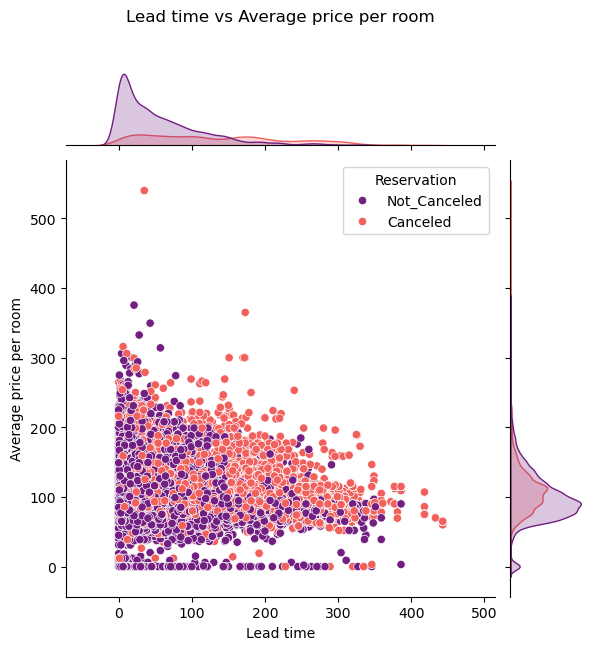

In [64]:
jnt = sns.jointplot(data=df, x='lead_time', y='avg_price_per_room', hue='booking_status', palette='magma')
plt.gca().set_title('Lead time vs Average price per room', y=1.3)
plt.legend(loc='upper right', title='Reservation', prop={'size': 10})
jnt.ax_joint.set_xlabel('Lead time')
jnt.ax_joint.set_ylabel('Average price per room')

## 구매 경로에 따른 취소여부

Text(0, 0.5, 'Lead time')

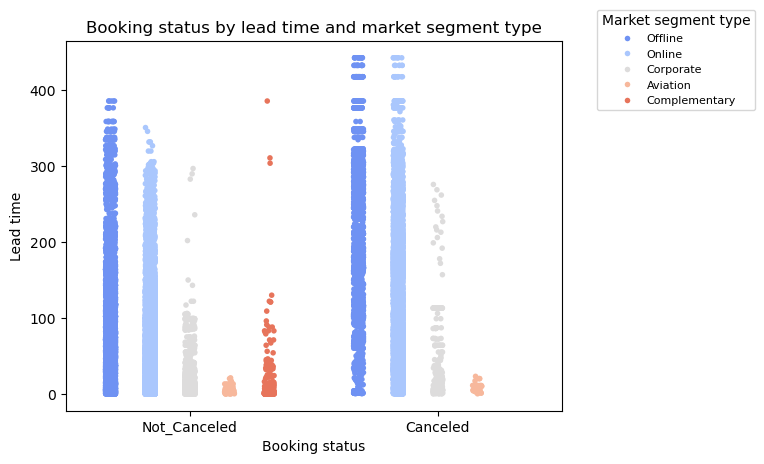

In [65]:
stp = sns.stripplot(data=df, x='booking_status', y='lead_time', hue='market_segment_type', jitter=True, dodge=True, palette='coolwarm', size=4)
plt.gca().set_title('Booking status by lead time and market segment type')
labels_dict= {'Online': 0, 'Offline': 1, 'Corporate': 2, 'Complementary': 3}
plt.legend(title='Market segment type', prop={'size': 8}, bbox_to_anchor=(1.4, 1.1))
stp.set_xlabel('Booking status')
stp.set_ylabel('Lead time')

## 구매 경로 stack 형식(월별)

Text(-3.930555555555541, 0.5, 'Number of visitors')

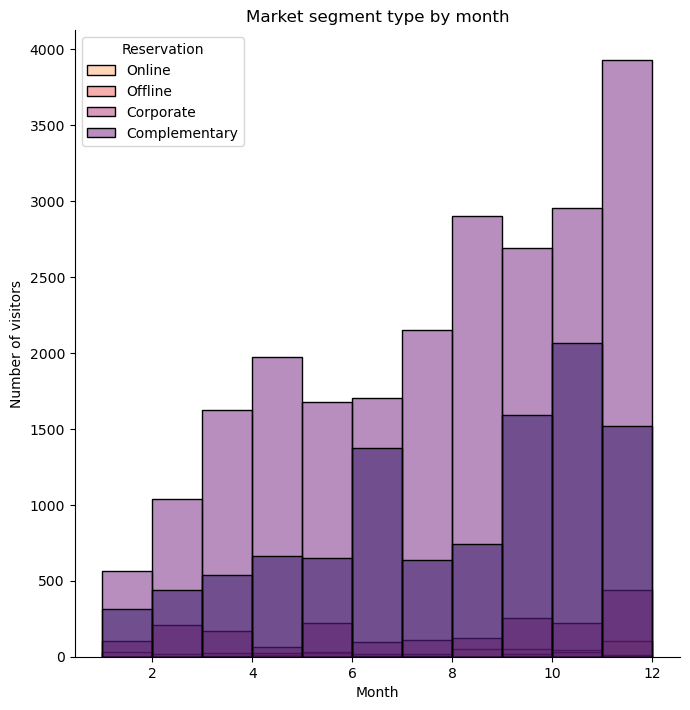

In [66]:
sns.displot(df, x='arrival_month', hue='market_segment_type', palette='magma', binwidth=1, height=7, legend=False)
plt.gca().set_title('Market segment type by month')
plt.legend(title='Reservation', labels=['Online', 'Offline', 'Corporate', 'Complementary'])
plt.xlabel('Month')
plt.ylabel('Number of visitors')    